We are importing the required libraries and reading our dataset and creating a dataframe called df

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/ishaagrawal/Downloads/Data Science competition project/PBP2324.csv')
df.head()

,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,home,0,0,0,3,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,away,3,0,3,25,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,home,3,0,3,0,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC


This code extracts unique games and dates from `df`, converts dates to a datetime format, reshapes the data to have a single column for teams with two rows per game (one for home and one for away), and calculates the number of rest days between games for each team.

In [171]:
games_and_dates = df[['game_id', 'date', 'home', 'away']].drop_duplicates()
games_and_dates["date"] = pd.to_datetime(games_and_dates["date"])
# combine the home and away teams into a single column, but two rows per game
games_and_dates = pd.melt(games_and_dates, id_vars=['game_id', 'date'], value_vars=['home', 'away'], 
                    var_name='home_away', value_name='team')
games_and_dates.drop(columns=['home_away'], inplace=True)
games_and_dates.sort_values(by=['team', 'date'], inplace=True)
games_and_dates['rest_days'] = games_and_dates.groupby('team')['date'].diff().dt.days - 1
games_and_dates

,game_id,date,team,rest_days
11465,401600143,2023-12-30,ANTELOPE,NaN
11872,401592097,2023-12-10,AR-Fort Smith,NaN
6377,401594537,2023-11-06,AR-Pine Bluff,NaN
377,401604754,2023-11-09,AR-Pine Bluff,2.0
378,401611838,2023-11-11,AR-Pine Bluff,1.0
...,...,...,...,...
7428,401587744,2024-02-17,Youngstown St,2.0
10008,401587749,2024-02-23,Youngstown St,5.0
8734,401587754,2024-02-25,Youngstown St,1.0
1903,401587756,2024-02-28,Youngstown St,2.0


The code games_and_dates.rest_days.hist(bins=20) creates a histogram to visualize the frequency distribution of the number of rest days between games for each team.

<Axes: >

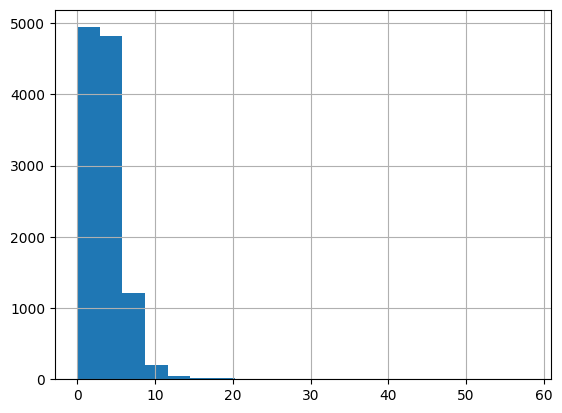

In [172]:
games_and_dates.rest_days.hist(bins=20)

Checking if there are any null values present 

In [173]:
games_and_dates.isna().sum()

game_id        0
date           0
team           0
rest_days    706
dtype: int64

Filling the null values with the median of the rest days 

In [174]:
# Fill the NaN values with median rest days of the team, if the team has played at least one game, otherwise median rest days of all teams
median_rest_days = games_and_dates.groupby('team')['rest_days'].median()
median_rest_days.fillna(games_and_dates['rest_days'].median(), inplace=True)
median_rest_days = median_rest_days.astype(int)
games_and_dates['rest_days'] = games_and_dates['rest_days'].fillna(games_and_dates['team'].map(median_rest_days))
games_and_dates.isna().sum()

game_id      0
date         0
team         0
rest_days    0
dtype: int64

Verifying if lthe gameid, date, team and rest days are getting retrived using the game id

In [175]:
games_and_dates[games_and_dates['game_id'] == 401604781]

,game_id,date,team,rest_days
6001,401604781,2023-11-07,SW Adventist,0.0
0,401604781,2023-11-07,Texas A&M-CC,3.0


In [176]:
games_and_dates.drop(columns=['date'], inplace=True)

In [177]:
games_and_dates.set_index(['game_id', 'team'], inplace=True)



We filtered the data for Duke team players in 2023 and 2024, calculating each player's total shots and successful shots. This allowed us to determine the success rate (in %) for each player per year. We then visualized both the total shots attempted and success rates to highlight year-wise performance variations.


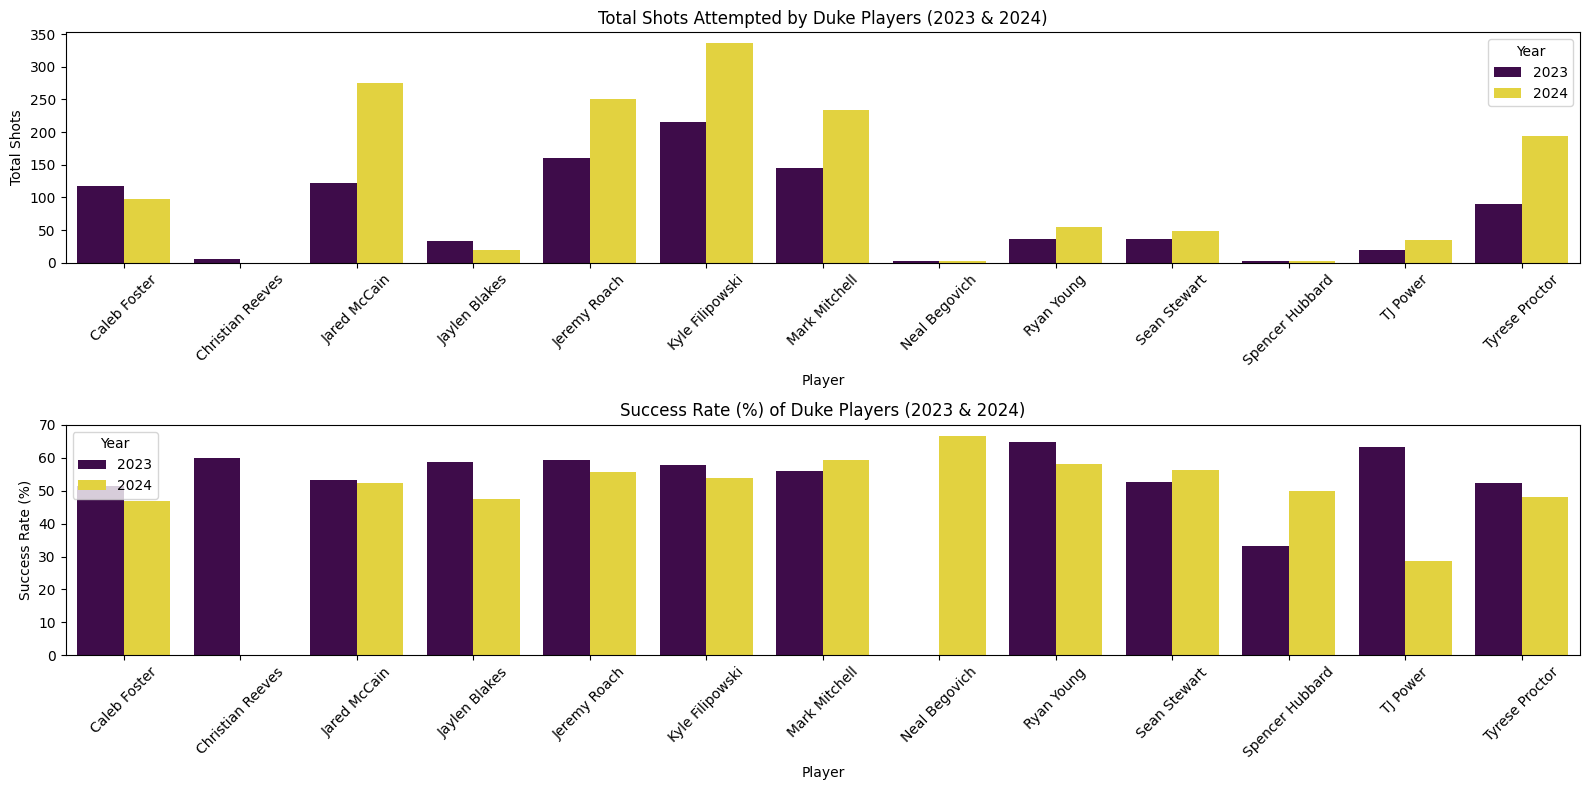

              Player  Year  Total Shots  Successful Shots  Success Rate (%)
0       Caleb Foster  2023          117                60         51.282051
1       Caleb Foster  2024           98                46         46.938776
2   Christian Reeves  2023            5                 3         60.000000
3       Jared McCain  2023          122                65         53.278689
4       Jared McCain  2024          275               144         52.363636
5      Jaylen Blakes  2023           34                20         58.823529
6      Jaylen Blakes  2024           19                 9         47.368421
7       Jeremy Roach  2023          160                95         59.375000
8       Jeremy Roach  2024          250               139         55.600000
9    Kyle Filipowski  2023          215               124         57.674419
10   Kyle Filipowski  2024          336               181         53.869048
11     Mark Mitchell  2023          145                81         55.862069
12     Mark 

In [178]:
# Calculate total shots attempted by each player
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the dataset for the Duke team and specific years
duke_filtered = df[(df['shot_team'] == 'Duke') & (df['date'].dt.year.isin([2023, 2024]))]

# Calculate total shots attempted by each player
total_shots = duke_filtered.groupby(['shooter', duke_filtered['date'].dt.year])['shot_outcome'].count().reset_index()
total_shots.columns = ['Player', 'Year', 'Total Shots']

# Calculate successful shots
successful_shots = duke_filtered[duke_filtered['shot_outcome'] == 'made'].groupby(['shooter', duke_filtered['date'].dt.year])['shot_outcome'].count().reset_index()
successful_shots.columns = ['Player', 'Year', 'Successful Shots']

# Merge the total and successful shots data
shots_data = pd.merge(total_shots, successful_shots, on=['Player', 'Year'], how='left')
shots_data['Successful Shots'] = shots_data['Successful Shots'].fillna(0).astype(int)  # Fill NaN with 0 for players with no successful shots

# Calculate success rate
shots_data['Success Rate (%)'] = (shots_data['Successful Shots'] / shots_data['Total Shots']) * 100

# Visualization of total shots and success rate by player year-wise
plt.figure(figsize=(16, 8))

# Plot total shots
plt.subplot(2, 1, 1)
sns.barplot(data=shots_data, x='Player', y='Total Shots', hue='Year', palette='viridis')
plt.title('Total Shots Attempted by Duke Players (2023 & 2024)')
plt.xlabel('Player')
plt.ylabel('Total Shots')
plt.xticks(rotation=45)

# Plot success rate
plt.subplot(2, 1, 2)
sns.barplot(data=shots_data, x='Player', y='Success Rate (%)', hue='Year', palette='viridis')
plt.title('Success Rate (%) of Duke Players (2023 & 2024)')
plt.xlabel('Player')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Display the data for reference
print(shots_data)


We filtered the dataset for successful shots in 2023 and 2024, calculating each team's total successful shots and identifying the top-performing player for each team. The top 10 teams were ranked based on their total successful shots, and we annotated each bar with the best player from each team to provide a quick visual insight into individual contributions within the top-performing teams.


/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/3289680599.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_teams, x='Team', y='Successful Shots_Team', palette='viridis')


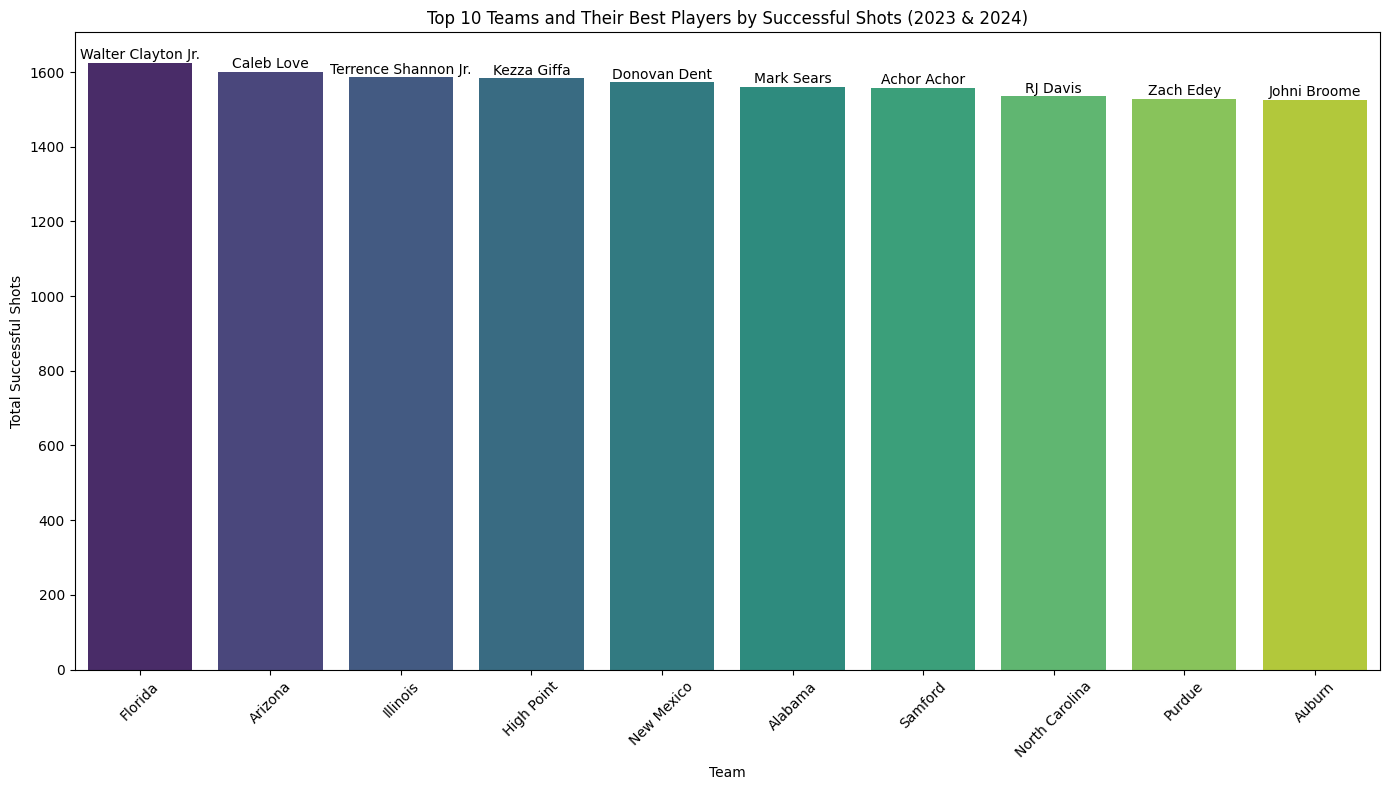

             Team                Player  Successful Shots_Team  \
0         Florida    Walter Clayton Jr.                   1625   
1         Arizona            Caleb Love                   1600   
2        Illinois  Terrence Shannon Jr.                   1586   
3      High Point           Kezza Giffa                   1583   
4      New Mexico          Donovan Dent                   1572   
5         Alabama            Mark Sears                   1560   
6         Samford           Achor Achor                   1558   
7  North Carolina              RJ Davis                   1535   
8          Purdue             Zach Edey                   1529   
9          Auburn          Johni Broome                   1525   

   Successful Shots_Player  
0                      309  
1                      311  
2                      387  
3                      356  
4                      280  
5                      390  
6                      299  
7                      379  
8           

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the years 2023 and 2024
filtered_df = df[(df['date'].dt.year == 2023) | (df['date'].dt.year == 2024)]

# Calculate successful shots by each player in each team
team_player_successful_shots = filtered_df[filtered_df['shot_outcome'] == 'made'].groupby(['shot_team', 'shooter'])['shot_outcome'].count().reset_index()
team_player_successful_shots.columns = ['Team', 'Player', 'Successful Shots']

# Calculate total successful shots for each team
team_total_successful_shots = team_player_successful_shots.groupby('Team')['Successful Shots'].sum().reset_index()
team_total_successful_shots = team_total_successful_shots.sort_values(by='Successful Shots', ascending=False)

# Get the top 10 teams
top_10_teams = team_total_successful_shots.head(10)

# Find the top player for each of the top 10 teams
top_players = team_player_successful_shots[team_player_successful_shots['Team'].isin(top_10_teams['Team'])]
top_players_by_team = top_players.loc[top_players.groupby('Team')['Successful Shots'].idxmax()]

# Merge team and top player data
top_10_teams = pd.merge(top_10_teams, top_players_by_team, on='Team', suffixes=('_Team', '_Player'))

# Visualization: Top 10 teams by total successful shots
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_teams, x='Team', y='Successful Shots_Team', palette='viridis')
plt.title('Top 10 Teams and Their Best Players by Successful Shots (2023 & 2024)')
plt.xlabel('Team')
plt.ylabel('Total Successful Shots')
plt.xticks(rotation=45)

# Annotate player names on top of the bars
for index, row in top_10_teams.iterrows():
    plt.text(
        x=index,
        y=row['Successful Shots_Team'] + 10,
        s=row['Player'],
        ha='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

# Display the top 10 teams with their top player stats
print(top_10_teams[['Team', 'Player', 'Successful Shots_Team', 'Successful Shots_Player']])



This analysis examines the performance of top players from selected teams during "clutch moments" (defined as the final 2 minutes of a game) compared to their normal game performance. For each player, we calculated the total successful shots during clutch moments and outside of them, and then calculated the clutch rate (clutch success relative to total success). The bar plot visualizes both clutch and normal success counts for each player, providing insights into their effectiveness under high-pressure situations.


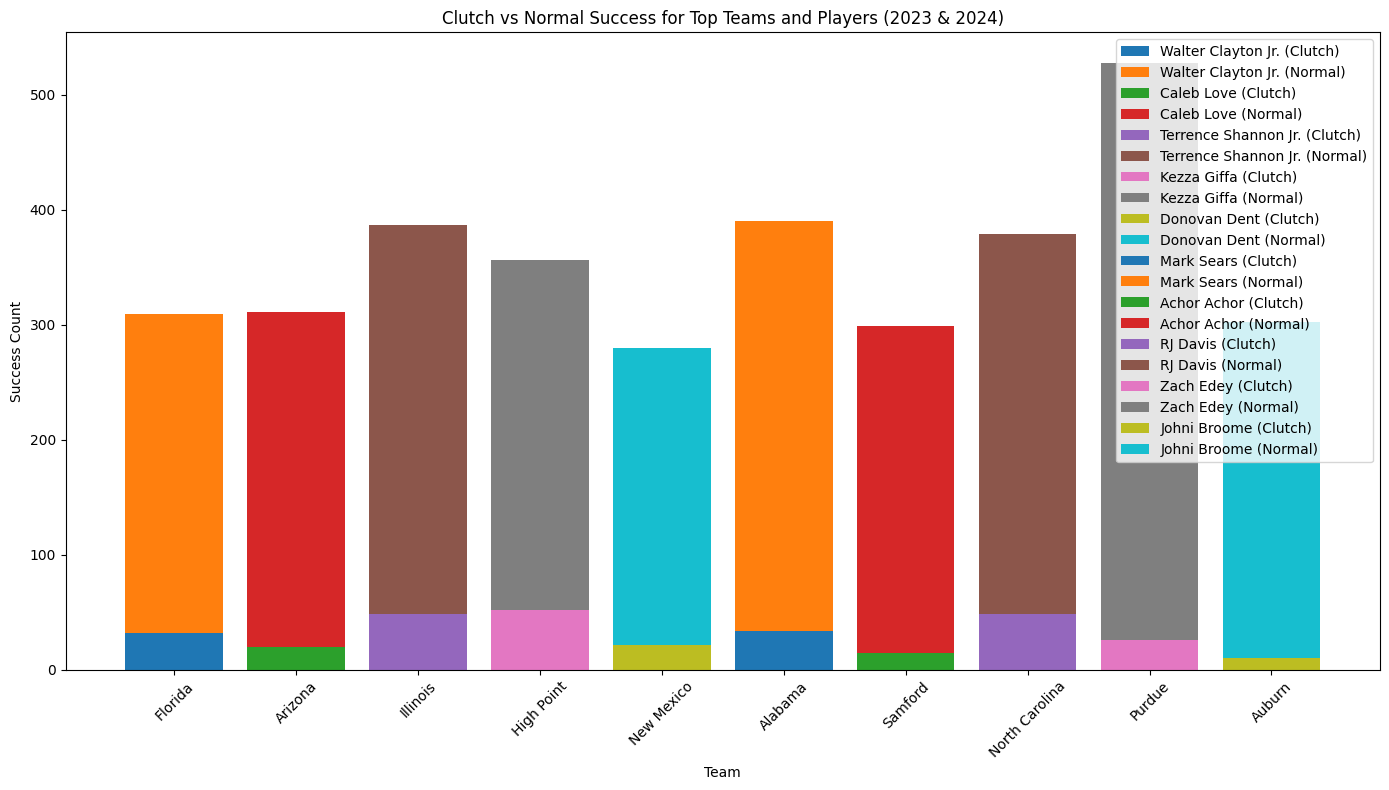

        shot_team               shooter  Clutch Success  Normal Success  \
0         Alabama            Mark Sears              34             356   
1         Arizona            Caleb Love              20             291   
2          Auburn          Johni Broome              10             292   
3         Florida    Walter Clayton Jr.              32             277   
4      High Point           Kezza Giffa              52             304   
5        Illinois  Terrence Shannon Jr.              48             339   
6      New Mexico          Donovan Dent              21             259   
7  North Carolina              RJ Davis              48             331   
8          Purdue             Zach Edey              26             502   
9         Samford           Achor Achor              14             285   

   Clutch Rate  
0     0.087179  
1     0.064309  
2     0.033113  
3     0.103560  
4     0.146067  
5     0.124031  
6     0.075000  
7     0.126649  
8     0.049242  
9   

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for 2023 and 2024
filtered_df = df[(df['date'].dt.year == 2023) | (df['date'].dt.year == 2024)]

# Define the top teams and players from your given data
top_teams_and_players = {
    'Florida': 'Walter Clayton Jr.',
    'Arizona': 'Caleb Love',
    'Illinois': 'Terrence Shannon Jr.',
    'High Point': 'Kezza Giffa',
    'New Mexico': 'Donovan Dent',
    'Alabama': 'Mark Sears',
    'Samford': 'Achor Achor',
    'North Carolina': 'RJ Davis',
    'Purdue': 'Zach Edey',
    'Auburn': 'Johni Broome'
}

# Filter data for the top teams and players
top_team_player_df = filtered_df[
    (filtered_df['shot_team'].isin(top_teams_and_players.keys())) &
    (filtered_df['shooter'].isin(top_teams_and_players.values()))
]

# Filter clutch moments (final 2 minutes of a game)
clutch_shots = top_team_player_df[top_team_player_df['secs_remaining_absolute'] <= 120]

# Compare clutch vs normal performance
clutch_success = clutch_shots[clutch_shots['shot_outcome'] == 'made'].groupby(['shot_team', 'shooter'])['shot_outcome'].count()
normal_success = (
    top_team_player_df[~top_team_player_df.index.isin(clutch_shots.index) & (top_team_player_df['shot_outcome'] == 'made')]
    .groupby(['shot_team', 'shooter'])['shot_outcome']
    .count()
)

# Merge clutch vs normal success
performance_comparison = pd.DataFrame({
    'Clutch Success': clutch_success,
    'Normal Success': normal_success
}).fillna(0)
performance_comparison['Clutch Rate'] = performance_comparison['Clutch Success'] / (
    performance_comparison['Clutch Success'] + performance_comparison['Normal Success']
)

# Visualization
performance_comparison = performance_comparison.reset_index()
plt.figure(figsize=(14, 8))
for team, player in top_teams_and_players.items():
    team_data = performance_comparison[(performance_comparison['shot_team'] == team) & (performance_comparison['shooter'] == player)]
    if not team_data.empty:
        plt.bar(team, team_data['Clutch Success'].values[0], label=f"{player} (Clutch)")
        plt.bar(team, team_data['Normal Success'].values[0], bottom=team_data['Clutch Success'].values[0], label=f"{player} (Normal)")

plt.title('Clutch vs Normal Success for Top Teams and Players (2023 & 2024)')
plt.ylabel('Success Count')
plt.xlabel('Team')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the performance comparison
print(performance_comparison)



In this analysis, we divided the game into distinct time bins, from the start of the game to the last two minutes, to observe shooting frequency trends for top players. The data was grouped by players and time bins to visualize shot attempts across different game intervals. The bar plot provides an overview of when each player tends to take shots, highlighting patterns that may indicate strategic shooting tendencies during specific game phases.


/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/714118347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_team_player_df['time_bin'] = pd.cut(
/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/714118347.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_distribution = top_team_player_df.groupby(['shooter', 'time_bin']).size().reset_index(name='Shot_Count')


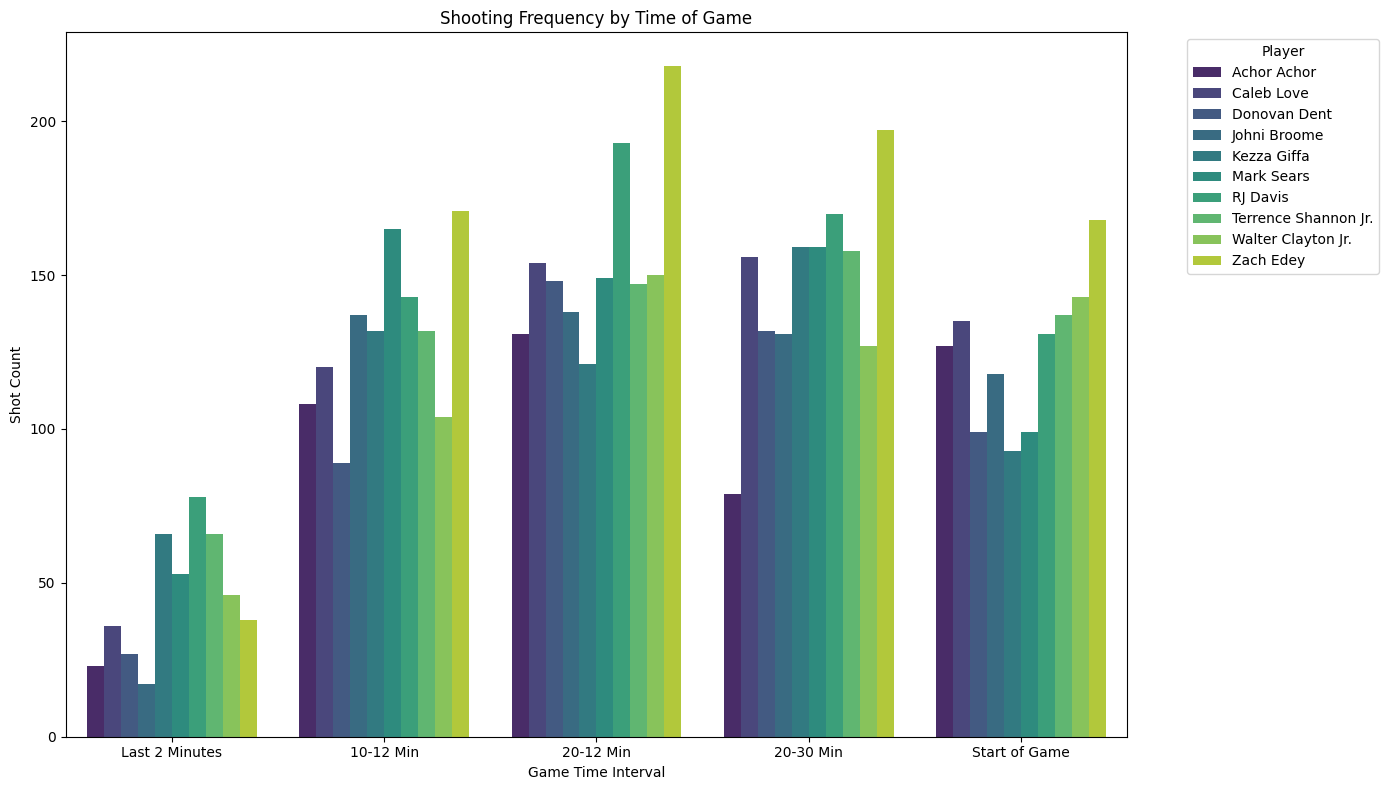

In [181]:
# Create time bins
top_team_player_df['time_bin'] = pd.cut(
    top_team_player_df['secs_remaining_absolute'],
    bins=[0, 120, 600, 1200, 1800, 2400],  # Adjust bins based on game time
    labels=['Last 2 Minutes', '10-12 Min', '20-12 Min', '20-30 Min', 'Start of Game']
)

# Frequency of shots by time bins
time_distribution = top_team_player_df.groupby(['shooter', 'time_bin']).size().reset_index(name='Shot_Count')

# Plot shot frequency
plt.figure(figsize=(14, 8))
sns.barplot(data=time_distribution, x='time_bin', y='Shot_Count', hue='shooter', palette='viridis')
plt.title('Shooting Frequency by Time of Game')
plt.xlabel('Game Time Interval')
plt.ylabel('Shot Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Player')
plt.tight_layout()
plt.show()

## Feature Engineering

Here we have merged the columns "home_rest_days" and "Away_rest_days"

In [182]:
df = df.merge(games_and_dates.rename(columns={"rest_days": "home_rest_days"}), left_on=['game_id', 'home'], right_on=['game_id', 'team'], how='left')
df = df.merge(games_and_dates.rename(columns={"rest_days": "away_rest_days"}), left_on=['game_id', 'away'], right_on=['game_id', 'team'], how='left')
df.head()


,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after,home_rest_days,away_rest_days
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC,3.0,0.0
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,home,0,0,0,3,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist,3.0,0.0
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,away,3,0,3,25,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,home,3,0,3,0,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0


Here we are calcualting and creating a new column(feature) called as `points` 

In [183]:
df["points"] = (df['shot_outcome'] == 'made') * (df['three_pt'] * 3 + (1 - df['three_pt']) * 2)
df.head()

,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after,home_rest_days,away_rest_days,points
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC,3.0,0.0,0
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,home,0,0,0,3,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist,3.0,0.0,3
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,away,3,0,3,25,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,home,3,0,3,0,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN


We are creating a new dataframe called player stats, in which we will be calculating the player efficiency by adding features like `PER`,  `FG_pct`, `3P_pct`,`FT_pct`,	`clutch_pct`

In [184]:
# Player Efficiency Rate
player_stats = df.groupby('shooter').agg({'points': 'sum', 'play_id': 'count'})
player_stats['PER'] = player_stats['points'] / player_stats['play_id']
player_stats.drop(['points', 'play_id'], axis=1, inplace=True)

In [185]:
shot_counts = df.groupby('shooter')['shot_outcome'].count()
made_shots = df[df['shot_outcome'] == 'made'].groupby('shooter')['shot_outcome'].count()
field_goal_percentage = made_shots / shot_counts

In [186]:
three_pointers = df[df['three_pt'] == 1].groupby('shooter')['shot_outcome'].count()
three_point_percentage = three_pointers / shot_counts

In [187]:
free_throws = df[df['free_throw'] == 1].groupby('shooter')['shot_outcome'].count()
free_throw_percentage = free_throws / shot_counts

In [188]:
player_stats["FG_pct"] = field_goal_percentage
player_stats["3P_pct"] = three_point_percentage
player_stats["FT_pct"] = free_throw_percentage
player_stats

,PER,FG_pct,3P_pct,FT_pct
shooter,,,,
,0.5,0.250000,0.250000,0.312500
A'lahn Sumler,1.042129,0.456763,0.394678,0.175166
A.J. Hoggard,1.07971,0.512077,0.164251,0.256039
A.J. Lopez,1.121212,0.506494,0.329004,0.225108
A.J. Neal,0.955414,0.401274,0.458599,0.184713
...,...,...,...,...
Zvonimir Ivisic,1.352113,0.633803,0.225352,0.281690
Zy'Nyia White,1.1,0.500000,0.200000,0.400000
Zyeir Lawrence,0.5,0.250000,NaN,0.375000


In [189]:
# clutch shots
clutch_shots = df[(df['secs_remaining_absolute'] <= 120) & (abs(df['score_diff']) <= 5)]  # Define clutch situations
print(clutch_shots.shot_outcome.value_counts())
clutch_made = clutch_shots[clutch_shots['shot_outcome'] == 'made'].groupby('shooter')['shot_outcome'].count()
clutch_attempts = clutch_shots.groupby('shooter')['shot_outcome'].count()

clutch_percentage = clutch_made / clutch_attempts
player_stats['clutch_pct'] = clutch_percentage
player_stats.fillna(0, inplace=True)

player_stats

shot_outcome
made      12841
missed     9265
Name: count, dtype: int64


,PER,FG_pct,3P_pct,FT_pct,clutch_pct
shooter,,,,,
,0.5,0.250000,0.250000,0.312500,0.000000
A'lahn Sumler,1.042129,0.456763,0.394678,0.175166,0.692308
A.J. Hoggard,1.07971,0.512077,0.164251,0.256039,0.722222
A.J. Lopez,1.121212,0.506494,0.329004,0.225108,0.500000
A.J. Neal,0.955414,0.401274,0.458599,0.184713,0.571429
...,...,...,...,...,...
Zvonimir Ivisic,1.352113,0.633803,0.225352,0.281690,0.000000
Zy'Nyia White,1.1,0.500000,0.200000,0.400000,0.000000
Zyeir Lawrence,0.5,0.250000,0.000000,0.375000,0.000000


We have created a seperate dataset for home and away games to calculate the overall team performance 

In [190]:
# Team Performance
# Create separate DataFrames for home and away games
home_games = df[df['action_team'] == 'home']
away_games = df[df['action_team'] == 'away']

In [191]:
# Calculate points and plays for home games
home_team_points = home_games.groupby('home')['points'].sum()
home_team_plays = home_games.groupby('home')['play_id'].count()
home_team_performance = home_team_points / home_team_plays
home_team_performance

home
AR-Pine Bluff     0.619503
Abilene Chrstn    0.570608
Air Force         0.542373
Akron             0.564856
Alabama            0.63105
                    ...   
Wright St         0.658087
Wyoming           0.603371
Xavier            0.558805
Yale              0.578699
Youngstown St     0.601592
Length: 364, dtype: object

In [192]:
# Calculate points and plays for away games
away_team_points = away_games.groupby('away')['points'].sum()
away_team_plays = away_games.groupby('away')['play_id'].count()
away_team_performance = away_team_points / away_team_plays
away_team_performance

away
ANTELOPE           0.49711
AR-Fort Smith     0.448052
AR-Pine Bluff      0.59605
AVILA             0.429967
Abilene Chrstn    0.512095
                    ...   
Xavier            0.535842
Xavier LA         0.425325
YORKCOLNEB        0.516556
Yale              0.557805
Youngstown St     0.536226
Length: 705, dtype: object

In [193]:
# Commpute team performance as mean of home and away performance, if any team has only home or away games, use that
team_performance = (home_team_performance + away_team_performance) / 2
team_performance = team_performance.fillna(home_team_performance).fillna(away_team_performance)
team_performance

/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/1450130376.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  team_performance = team_performance.fillna(home_team_performance).fillna(away_team_performance)


ANTELOPE          0.497110
AR-Fort Smith     0.448052
AR-Pine Bluff     0.607776
AVILA             0.429967
Abilene Chrstn    0.541351
                    ...   
Xavier            0.547324
Xavier LA         0.425325
YORKCOLNEB        0.516556
Yale              0.568252
Youngstown St     0.568909
Length: 706, dtype: float64

We are merging our dataset with the perfromamnce of home and away teams 

In [194]:

df = df.merge(home_team_performance.rename('home_team_home_rating'), left_on='home', right_index=True, how='left')
df = df.merge(away_team_performance.rename('away_team_away_rating'), left_on='away', right_index=True, how='left')
df = df.merge(team_performance.rename('home_team_rating'), left_on='home', right_index=True, how='left')
df = df.merge(team_performance.rename('away_team_rating'), left_on='away', right_index=True, how='left')
df.head()

,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after,home_rest_days,away_rest_days,points,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC,3.0,0.0,0,0.525312,0.444444,0.519434,0.444444
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,home,0,0,0,3,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN,0.525312,0.444444,0.519434,0.444444
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist,3.0,0.0,3,0.525312,0.444444,0.519434,0.444444
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,away,3,0,3,25,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN,0.525312,0.444444,0.519434,0.444444
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,home,3,0,3,0,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN,0.525312,0.444444,0.519434,0.444444




In this analysis, we computed win percentages for teams based on their performances at home and away. The steps involved:

1. **Identify Game Winners**: Filtered data for game-end moments (when `secs_remaining = 0`) to determine which team won based on the `score_diff`. The `winner` column was created to mark a team win with a value of 1 if the score difference was positive.

2. **Home Win Percentage**: Merged this result with `home_games` to isolate games played at home. Calculated total games played at home and the total wins to derive each team’s home win percentage.

3. **Away Win Percentage**: Similarly, merged with `away_games` and calculated each team’s away win percentage.

4. **Overall Team Win Percentage**: Computed as an average of home and away win percentages for each team, filling in values for teams that had data only for one condition (home or away). The final win percentages were then merged into the main dataset as additional columns.

This breakdown allows analysis of how home-court advantage and away performance contribute to a team’s overall success rate.


In [195]:
# Get one row per game id with secs remaining = 0 and see which team won
game_wins = df[df["secs_remaining"] == 0].groupby('game_id').agg({'score_diff': 'last'})
game_wins['winner'] = (game_wins['score_diff'] > 0) * 1
game_wins = game_wins.reset_index()
game_wins

,game_id,score_diff,winner
0,401573353,10,1
1,401573354,-14,0
2,401573355,-4,0
3,401573356,4,1
4,401573357,-7,0
...,...,...,...
5809,401634067,20,1
5810,401634068,-1,0
5811,401634069,13,1
5812,401634070,5,1


In [196]:
# Merge the dataframes
home_wins = game_wins.merge(home_games[["game_id", "home"]].drop_duplicates(), on='game_id', how='left')

# Calculate total games played by each team at home
total_home_games = home_wins.groupby('home')['game_id'].count()

# Calculate total wins by each team at home
home_wins = home_wins.groupby('home')['winner'].sum()

# Calculate win percentage
home_win_percentage = (home_wins / total_home_games) * 100 
home_win_percentage

home
AR-Pine Bluff     61.538462
Abilene Chrstn    57.142857
Air Force         25.000000
Akron             78.947368
Alabama           83.333333
                    ...    
Wright St         52.941176
Wyoming           58.823529
Xavier            57.894737
Yale              81.818182
Youngstown St     80.000000
Length: 364, dtype: float64

In [197]:
# Merge the dataframes
away_wins = game_wins.merge(away_games[["game_id", "away"]].drop_duplicates(), on='game_id', how='left')

# Calculate total games played by each team at home
total_away_games = away_wins.groupby('away')['game_id'].count()

# Calculate total wins by each team at home
away_wins = away_wins.groupby('away')['winner'].sum()

# Calculate win percentage
away_win_percentage = (away_wins / total_away_games) * 100 
away_win_percentage

away
ANTELOPE          100.000000
AR-Fort Smith     100.000000
AR-Pine Bluff      64.285714
AVILA             100.000000
Abilene Chrstn     71.428571
                     ...    
Xavier             64.285714
Xavier LA         100.000000
YORKCOLNEB        100.000000
Yale               43.750000
Youngstown St      50.000000
Length: 691, dtype: float64

In [198]:
team_win_percentage = (home_win_percentage + away_win_percentage) / 2
team_win_percentage = team_win_percentage.fillna(home_win_percentage).fillna(away_win_percentage)

In [199]:
df = df.merge(home_win_percentage.rename('home_team_home_win_percentage'), left_on='home', right_index=True, how='left')
df = df.merge(away_win_percentage.rename('away_team_away_win_percentage'), left_on='away', right_index=True, how='left')
df = df.merge(team_win_percentage.rename('home_team_win_percentage'), left_on='home', right_index=True, how='left')
df = df.merge(team_win_percentage.rename('away_team_win_percentage'), left_on='away', right_index=True, how='left')
df.head()

,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,score_diff,play_length,scoring_play,foul,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,referees,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after,home_rest_days,away_rest_days,points,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,away,0,0,0,0,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC,3.0,0.0,0,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,home,0,0,0,3,False,False,0.500000,0.500000,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,3,11,True,False,0.566960,0.566960,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist,3.0,0.0,3,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,away,3,0,3,25,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,home,3,0,3,0,False,False,0.567762,0.567762,6,6,NaN,NaN,Derek Schulte/Carl Gray/Eric Kronebusch,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC,3.0,0.0,NaN,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0


The code calculates mean and median scores for teams as home and away, then averages these to get overall team scores. These stats are merged into the main DataFrame for each game, providing both home, away, and overall scoring metrics.

In [200]:
home_team_scores = df.groupby('home')['points'].agg(['mean', 'median']).rename(columns={'mean': 'home_team_home_score_mean', 
                                                                                        'median': 'home_team_home_score_median'})
away_team_scores = df.groupby('away')['points'].agg(['mean', 'median']).rename(columns={'mean': 'away_team_away_score_mean', 
                                                                                        'median': 'away_team_away_score_median'})

home_team_scores

,home_team_home_score_mean,home_team_home_score_median
home,,
AR-Pine Bluff,1.15964,2.0
Abilene Chrstn,1.13487,2.0
Air Force,1.173561,2.0
Akron,1.07961,0.0
Alabama,1.154167,2.0
...,...,...
Wright St,1.201845,2.0
Wyoming,1.162142,2.0
Xavier,1.089251,2.0


In [201]:
away_team_scores

,away_team_away_score_mean,away_team_away_score_median
away,,
ANTELOPE,1.133721,2.0
AR-Fort Smith,1.0,0.0
AR-Pine Bluff,1.169627,2.0
AVILA,1.015385,0.0
Abilene Chrstn,1.096507,2.0
...,...,...
Xavier,1.110067,2.0
Xavier LA,0.975232,0.0
YORKCOLNEB,1.163636,2.0


In [202]:
# Compute mean of home and away scores, if any team has only home or away games, use that
team_scores = home_team_scores.merge(away_team_scores, left_index=True, right_index=True, how='outer')
print(team_scores.head())
team_scores['mean_points'] = team_scores[['home_team_home_score_mean', 'away_team_away_score_mean']].mean(axis=1)
team_scores['median_points'] = team_scores[['home_team_home_score_median', 'away_team_away_score_median']].mean(axis=1)
team_scores = team_scores[['mean_points', 'median_points']]
team_scores

               home_team_home_score_mean home_team_home_score_median  \
ANTELOPE                             NaN                         NaN   
AR-Fort Smith                        NaN                         NaN   
AR-Pine Bluff                    1.15964                         2.0   
AVILA                                NaN                         NaN   
Abilene Chrstn                   1.13487                         2.0   

               away_team_away_score_mean away_team_away_score_median  
ANTELOPE                        1.133721                         2.0  
AR-Fort Smith                        1.0                         0.0  
AR-Pine Bluff                   1.169627                         2.0  
AVILA                           1.015385                         0.0  
Abilene Chrstn                  1.096507                         2.0  


,mean_points,median_points
ANTELOPE,1.133721,2.0
AR-Fort Smith,1.0,0.0
AR-Pine Bluff,1.164633,2.0
AVILA,1.015385,0.0
Abilene Chrstn,1.115689,2.0
...,...,...
Xavier,1.099659,2.0
Xavier LA,0.975232,0.0
YORKCOLNEB,1.163636,2.0
Yale,1.102091,1.0


In [203]:
df = df.merge(home_team_scores, left_on='home', right_index=True, how='left')
df = df.merge(away_team_scores, left_on='away', right_index=True, how='left')
df = df.merge(team_scores.rename(columns={"mean_points": "home_team_score_mean", 
                                          "median_points": "home_team_score_median"}), left_on='home', right_index=True, how='left')
df = df.merge(team_scores.rename(columns={"mean_points": "away_team_score_mean", 
                                          "median_points": "away_team_score_median"}), left_on='away', right_index=True, how='left')

In [204]:
df.dropna(subset=['shooter'], inplace=True)

In [205]:
# Drop specified columns
columns_to_drop = ['date', 'play_id', 'half',
                   'time_remaining_half', 'secs_remaining_absolute', 'description',
                   'play_length', 'scoring_play', 'foul', 'referees',
                   'arena_location', 'arena', 'attendance', 'possession_before',
                   'possession_after', 'shot_team', 'shot_outcome']
df.drop(columns=columns_to_drop, inplace=True)

In [206]:
df.columns

Index(['game_id', 'home', 'away', 'secs_remaining', 'action_team',
       'home_score', 'away_score', 'score_diff', 'win_prob', 'naive_win_prob',
       'home_time_out_remaining', 'away_time_out_remaining', 'home_favored_by',
       'total_line', 'shooter', 'three_pt', 'free_throw', 'home_rest_days',
       'away_rest_days', 'points', 'home_team_home_rating',
       'away_team_away_rating', 'home_team_rating', 'away_team_rating',
       'home_team_home_win_percentage', 'away_team_away_win_percentage',
       'home_team_win_percentage', 'away_team_win_percentage',
       'home_team_home_score_mean', 'home_team_home_score_median',
       'away_team_away_score_mean', 'away_team_away_score_median',
       'home_team_score_mean', 'home_team_score_median',
       'away_team_score_mean', 'away_team_score_median'],
      dtype='object')

In [207]:
df["action_team"].value_counts()

action_team
home    475894
away    456220
Name: count, dtype: int64

The code calculates various player stats (PER, FG%, 3P%, FT%, clutch%) for each game and action team, aggregating by mean, max, and median. These aggregated stats are then merged back into the main DataFrame for each game, updating player performance metrics.

In [208]:
temp_filter_columns = ['game_id', 'action_team', 'points', 'PER', 'FG_pct', '3P_pct', 'FT_pct', 'clutch_pct']

temp_df = df.merge(player_stats[['PER', 'FG_pct', '3P_pct', 'FT_pct', 'clutch_pct']], left_on='shooter', right_index=True, how='left')

game_wise_player_stats = temp_df[temp_filter_columns].drop_duplicates().groupby(['game_id', 'action_team']).agg(
            {
                # 'points': ['mean', 'max', 'median'], 
                'PER': ['mean', 'max', 'median'], 
                'FG_pct': ['mean', 'max', 'median'], 
                '3P_pct': ['mean', 'max', 'median'], 
                'FT_pct': ['mean', 'max', 'median'], 
                'clutch_pct': ['mean', 'max', 'median']}
             ).unstack()
game_wise_player_stats

PER                                                    \
                 mean                 max              median             
action_team      away      home      away      home      away      home   
game_id                                                                   
401573353    1.195221  1.278711   1.29703  1.392683  1.247036  1.264706   
401573354      1.1386  1.099737  1.264113  1.291803  1.163972  1.072727   
401573355    1.036346   1.14171  1.266667       2.0  1.091514  1.102484   
401573356    1.192284  1.173806  1.360248  1.266564  1.178082  1.168116   
401573357    1.118399  1.111051  1.318182  1.188713  1.097902   1.09434   
...               ...       ...       ...       ...       ...       ...   
401634067    1.134574  1.126772  1.246231  1.242105  1.125278  1.123934   
401634068    1.095032   1.12121  1.365854  1.229665  1.094488  1.135135   
401634069    1.180533  1.148721  1.326409  1.308642  1.173585  1.127371   
401634070     1.17603  1.118986  1.473684  1.246612  1.170732  1.100917   
401636059    1.128188  1.122508  1.290102  1.186813  1.127371  1.135501   

               FG_pct                                                    \
                 mean                 max              median             
action_team      away      home      away      home      away      home   
game_id                                                                   
401573353    0.546876  0.586411  0.648515  0.635659  0.543478  0.594444   
401573354    0.507972  0.501345  0.597403  0.616393  0.532864  0.486911   
401573355    0.473713  0.533018  0.581114  1.000000  0.484193  0.524730   
401573356    0.544934  0.532174  0.638629  0.607088  0.540373  0.513043   
401573357    0.520815  0.521215  0.659091  0.584416  0.524476  0.520282   
...               ...       ...       ...       ...       ...       ...   
401634067    0.514723  0.522940  0.621429  0.621053  0.500968  0.527266   
401634068    0.497969  0.499882  0.682927  0.567568  0.437173  0.500000   
401634069    0.521557  0.496145  0.554896  0.641638  0.519149  0.482547   
401634070    0.547030  0.514873  0.625000  0.623306  0.545082  0.501529   
401636059    0.504514  0.509209  0.641638  0.583127  0.485095  0.495935   

               3P_pct                                                    \
                 mean                 max              median             
action_team      away      home      away      home      away      home   
game_id                                                                   
401573353    0.295587  0.285288  0.560150  0.514019  0.354430  0.301887   
401573354    0.357801  0.299955  0.710843  0.454545  0.371585  0.320455   
401573355    0.319205  0.237546  0.619048  0.474359  0.374376  0.221273   
401573356    0.279507  0.319433  0.645963  0.578125  0.276256  0.423188   
401573357    0.235451  0.203925  0.602740  0.443396  0.198370  0.253425   
...               ...       ...       ...       ...       ...       ...   
401634067    0.284511  0.246669  0.569061  0.582192  0.289481  0.236412   
401634068    0.337114  0.355773  0.649606  0.527363  0.266254  0.402778   
401634069    0.358451  0.430454  0.550336  0.817259  0.328740  0.442857   
401634070    0.217397  0.267588  0.467105  0.801136  0.176724  0.308319   
401636059    0.333333  0.304579  0.817259  0.600733  0.349794  0.333284   

               FT_pct                                                    \
                 mean                 max              median             
action_team      away      home      away      home      away      home   
game_id                                                                   
401573353    0.229073  0.286765  0.352273  0.495475  0.230380  0.274011   
401573354    0.217162  0.232643  0.296000  0.287958  0.259740  0.227273   
401573355    0.214358  0.253775  0.320988  0.426471  0.180157  0.241558   
401573356    0.234415  0.243531  0.445455  0.322034  0.223602  0.268139   
401573357    0.294084  0.282987  0.41919

In [209]:
game_wise_player_stats.columns = ['_'.join(col).strip() for col in game_wise_player_stats.columns.values]
game_wise_player_stats

,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
401573353,1.195221,1.278711,1.29703,1.392683,1.247036,1.264706,0.546876,0.586411,0.648515,0.635659,0.543478,0.594444,0.295587,0.285288,0.560150,0.514019,0.354430,0.301887,0.229073,0.286765,0.352273,0.495475,0.230380,0.274011,0.546667,0.647950,1.000000,1.0,0.666667,0.666667
401573354,1.1386,1.099737,1.264113,1.291803,1.163972,1.072727,0.507972,0.501345,0.597403,0.616393,0.532864,0.486911,0.357801,0.299955,0.710843,0.454545,0.371585,0.320455,0.217162,0.232643,0.296000,0.287958,0.259740,0.227273,0.492682,0.450510,0.700000,1.0,0.575758,0.500000
401573355,1.036346,1.14171,1.266667,2.0,1.091514,1.102484,0.473713,0.533018,0.581114,1.000000,0.484193,0.524730,0.319205,0.237546,0.619048,0.474359,0.374376,0.221273,0.214358,0.253775,0.320988,0.426471,0.180157,0.241558,0.481137,0.568885,1.000000,1.0,0.500000,0.571429
401573356,1.192284,1.173806,1.360248,1.266564,1.178082,1.168116,0.544934,0.532174,0.638629,0.607088,0.540373,0.513043,0.279507,0.319433,0.645963,0.578125,0.276256,0.423188,0.234415,0.243531,0.445455,0.322034,0.223602,0.268139,0.607907,0.618266,1.000000,1.0,0.652174,0.666667
401573357,1.118399,1.111051,1.318182,1.188713,1.097902,1.09434,0.520815,0.521215,0.659091,0.584416,0.524476,0.520282,0.235451,0.203925,0.602740,0.443396,0.198370,0.253425,0.294084,0.282987,0.419192,0.367876,0.341121,0.311538,0.448413,0.497199,0.714286,1.0,0.611111,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401634067,1.134574,1.126772,1.246231,1.242105,1.125278,1.123934,0.514723,0.522940,0.621429,0.621053,0.500968,0.527266,0.284511,0.246669,0.569061,0.582192,0.289481,0.236412,0.243406,0.238589,0.385714,0.442105,0.217647,0.248092,0.367965,0.568154,0.666667,1.0,0.500000,0.598039
401634068,1.095032,1.12121,1.365854,1.229665,1.094488,1.135135,0.497969,0.499882,0.682927,0.567568,0.437173,0.500000,0.337114,0.355773,0.649606,0.527363,0.266254,0.402778,0.198283,0.240740,0.328358,0.513514,0.191950,0.193548,0.408403,0.522511,0.666667,1.0,0.500000,0.545455
401634069,1.180533,1.148721,1.326409,1.308642,1.173585,1.127371,0.521557,0.496145,0.554896,0.641638,0.519149,0.482547,0.358451,0.430454,0.550336,0.817259,0.328740,0.442857,0.244515,0.197074,0.303704,0.341297,0.253937,0.193703,0.431046,0.470769,0.666667,1.0,0.558824,0.500000


In [210]:
# Update PER for rows as per game id and action team
df = df.merge(game_wise_player_stats.reset_index(), on=['game_id'], how='left', validate='many_to_one')
df.head()

,game_id,home,away,secs_remaining,action_team,home_score,away_score,score_diff,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,shooter,three_pt,free_throw,home_rest_days,away_rest_days,points,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage,home_team_home_score_mean,home_team_home_score_median,away_team_away_score_mean,away_team_away_score_median,home_team_score_mean,home_team_score_median,away_team_score_mean,away_team_score_median,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home
0,401604781,Texas A&M-CC,SW Adventist,2378,away,0,0,0,0.500000,0.500000,6,6,NaN,NaN,Jason Garcia,False,False,3.0,0.0,0,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0,1.058931,0.0,1.092754,2.0,1.080684,1.0,1.092754,2.0,0.990835,1.009991,1.333333,1.241379,1.095238,1.004785,0.460506,0.468688,0.666667,0.62069,0.488095,0.461538,0.22105,0.235619,0.75,0.47619,0.178947,0.216314,0.25016,0.246686,0.526316,0.420168,0.275,0.231084,0.0,0.195739,0.0,0.777778,0.0,0.0
1,401604781,Texas A&M-CC,SW Adventist,2364,home,3,0,3,0.566960,0.566960,6,6,NaN,NaN,Jordan Roberts,True,False,3.0,0.0,3,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0,1.058931,0.0,1.092754,2.0,1.080684,1.0,1.092754,2.0,0.990835,1.009991,1.333333,1.241379,1.095238,1.004785,0.460506,0.468688,0.666667,0.62069,0.488095,0.461538,0.22105,0.235619,0.75,0.47619,0.178947,0.216314,0.25016,0.246686,0.526316,0.420168,0.275,0.231084,0.0,0.195739,0.0,0.777778,0.0,0.0
2,401604781,Texas A&M-CC,SW Adventist,2325,away,3,0,3,0.568216,0.568216,6,6,NaN,NaN,Marcel Phifer,True,False,3.0,0.0,0,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0,1.058931,0.0,1.092754,2.0,1.080684,1.0,1.092754,2.0,0.990835,1.009991,1.333333,1.241379,1.095238,1.004785,0.460506,0.468688,0.666667,0.62069,0.488095,0.461538,0.22105,0.235619,0.75,0.47619,0.178947,0.216314,0.25016,0.246686,0.526316,0.420168,0.275,0.231084,0.0,0.195739,0.0,0.777778,0.0,0.0
3,401604781,Texas A&M-CC,SW Adventist,2313,home,3,0,3,0.568608,0.568608,6,6,NaN,NaN,Stephen Giwa,False,False,3.0,0.0,0,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0,1.058931,0.0,1.092754,2.0,1.080684,1.0,1.092754,2.0,0.990835,1.009991,1.333333,1.241379,1.095238,1.004785,0.460506,0.468688,0.666667,0.62069,0.488095,0.461538,0.22105,0.235619,0.75,0.47619,0.178947,0.216314,0.25016,0.246686,0.526316,0.420168,0.275,0.231084,0.0,0.195739,0.0,0.777778,0.0,0.0
4,401604781,Texas A&M-CC,SW Adventist,2310,home,5,0,5,0.613242,0.613242,6,6,NaN,NaN,Garry Clark,False,False,3.0,0.0,2,0.525312,0.444444,0.519434,0.444444,71.428571,100.0,59.047619,100.0,1.058931,0.0,1.092754,2.0,1.080684,1.0,1.092754,2.0,0.990835,1.009991,1.333333,1.241379,1.095238,1.004785,0.460506,0.468688,0.666667,0.62069,0.488095,0.461538,0.22105,0.235619,0.75,0.47619,0.178947,0.216314,0.25016,0.246686,0.526316,0.420168,0.275,0.231084,0.0,0.195739,0.0,0.777778,0.0,0.0


In [211]:
# Temporatily drop null values
df.dropna(inplace=True)
100 * df.isna().sum() / df.shape[0]

game_id                   0.0
home                      0.0
away                      0.0
secs_remaining            0.0
action_team               0.0
                         ... 
clutch_pct_mean_home      0.0
clutch_pct_max_away       0.0
clutch_pct_max_home       0.0
clutch_pct_median_away    0.0
clutch_pct_median_home    0.0
Length: 66, dtype: float64

In [212]:
df.head()

,game_id,home,away,secs_remaining,action_team,home_score,away_score,score_diff,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,shooter,three_pt,free_throw,home_rest_days,away_rest_days,points,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage,home_team_home_score_mean,home_team_home_score_median,away_team_away_score_mean,away_team_away_score_median,home_team_score_mean,home_team_score_median,away_team_score_mean,away_team_score_median,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home
165,401575435,Houston,Texas A&M-CC,2383,home,0,0,0,0.995346,0.500000,6,6,33.5,139.5,Jamal Shead,False,False,4.0,3.0,0,0.536203,0.513556,0.522008,0.519434,100.0,46.666667,62.5,59.047619,1.035946,0.0,1.102437,2.0,1.055968,0.0,1.080684,1.0,1.056451,1.05661,1.241379,1.229167,1.053232,1.042017,0.496787,0.486324,0.62069,0.614583,0.482667,0.48847,0.222164,0.258728,0.426966,0.578947,0.197333,0.276316,0.275753,0.267602,0.420168,0.419355,0.255927,0.271071,0.289519,0.428508,0.777778,1.0,0.285714,0.375
166,401575435,Houston,Texas A&M-CC,2373,away,0,0,0,0.995320,0.500000,6,6,33.5,139.5,Marion Humphrey,False,False,4.0,3.0,0,0.536203,0.513556,0.522008,0.519434,100.0,46.666667,62.5,59.047619,1.035946,0.0,1.102437,2.0,1.055968,0.0,1.080684,1.0,1.056451,1.05661,1.241379,1.229167,1.053232,1.042017,0.496787,0.486324,0.62069,0.614583,0.482667,0.48847,0.222164,0.258728,0.426966,0.578947,0.197333,0.276316,0.275753,0.267602,0.420168,0.419355,0.255927,0.271071,0.289519,0.428508,0.777778,1.0,0.285714,0.375
167,401575435,Houston,Texas A&M-CC,2368,away,0,2,-2,0.994391,0.455297,6,6,33.5,139.5,Garry Clark,False,False,4.0,3.0,2,0.536203,0.513556,0.522008,0.519434,100.0,46.666667,62.5,59.047619,1.035946,0.0,1.102437,2.0,1.055968,0.0,1.080684,1.0,1.056451,1.05661,1.241379,1.229167,1.053232,1.042017,0.496787,0.486324,0.62069,0.614583,0.482667,0.48847,0.222164,0.258728,0.426966,0.578947,0.197333,0.276316,0.275753,0.267602,0.420168,0.419355,0.255927,0.271071,0.289519,0.428508,0.777778,1.0,0.285714,0.375
168,401575435,Houston,Texas A&M-CC,2327,home,0,2,-2,0.994239,0.454408,6,6,33.5,139.5,J'Wan Roberts,False,False,4.0,3.0,0,0.536203,0.513556,0.522008,0.519434,100.0,46.666667,62.5,59.047619,1.035946,0.0,1.102437,2.0,1.055968,0.0,1.080684,1.0,1.056451,1.05661,1.241379,1.229167,1.053232,1.042017,0.496787,0.486324,0.62069,0.614583,0.482667,0.48847,0.222164,0.258728,0.426966,0.578947,0.197333,0.276316,0.275753,0.267602,0.420168,0.419355,0.255927,0.271071,0.289519,0.428508,0.777778,1.0,0.285714,0.375
169,401575435,Houston,Texas A&M-CC,2305,away,0,2,-2,0.994153,0.453924,6,6,33.5,139.5,Marion Humphrey,False,False,4.0,3.0,0,0.536203,0.513556,0.522008,0.519434,100.0,46.666667,62.5,59.047619,1.035946,0.0,1.102437,2.0,1.055968,0.0,1.080684,1.0,1.056451,1.05661,1.241379,1.229167,1.053232,1.042017,0.496787,0.486324,0.62069,0.614583,0.482667,0.48847,0.222164,0.258728,0.426966,0.578947,0.197333,0.276316,0.275753,0.267602,0.420168,0.419355,0.255927,0.271071,0.289519,0.428508,0.777778,1.0,0.285714,0.375


In [213]:
df.drop(columns=['home', 'away', 'shooter', 'win_prob', 'naive_win_prob', "home_favored_by", "total_line", 'three_pt', 'free_throw', 'points'], inplace=True)
df.sort_values(by=['game_id', 'secs_remaining'], ascending=[True, False], inplace=True)
df = df.groupby(['game_id']).last().reset_index(drop=True, inplace=False)
df

,secs_remaining,action_team,home_score,away_score,score_diff,home_time_out_remaining,away_time_out_remaining,home_rest_days,away_rest_days,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage,home_team_home_score_mean,home_team_home_score_median,away_team_away_score_mean,away_team_away_score_median,home_team_score_mean,home_team_score_median,away_team_score_mean,away_team_score_median,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home
0,19,away,89,79,10,2,-5,4.0,4.0,0.688661,0.597505,0.631708,0.612478,84.615385,46.666667,65.991903,62.807018,1.237648,2.0,1.175423,2.0,1.203312,2.0,1.16552,2.0,1.195221,1.278711,1.29703,1.392683,1.247036,1.264706,0.546876,0.586411,0.648515,0.635659,0.543478,0.594444,0.295587,0.285288,0.560150,0.514019,0.354430,0.301887,0.229073,0.286765,0.352273,0.495475,0.230380,0.274011,0.546667,0.647950,1.000000,1.0,0.666667,0.666667
1,20,home,48,62,-14,5,-3,4.0,4.0,0.52874,0.572494,0.544889,0.572934,38.888889,62.500000,54.059829,60.661765,1.113924,2.0,1.173273,2.0,1.137936,2.0,1.155426,2.0,1.1386,1.099737,1.264113,1.291803,1.163972,1.072727,0.507972,0.501345,0.597403,0.616393,0.532864,0.486911,0.357801,0.299955,0.710843,0.454545,0.371585,0.320455,0.217162,0.232643,0.296000,0.287958,0.259740,0.227273,0.492682,0.450510,0.700000,1.0,0.575758,0.500000
2,0,away,88,92,-4,8,-12,4.0,4.0,0.556686,0.509016,0.547435,0.534918,57.142857,64.705882,63.571429,59.019608,1.132027,2.0,1.129197,2.0,1.136645,2.0,1.120462,2.0,1.036346,1.14171,1.266667,2.0,1.091514,1.102484,0.473713,0.533018,0.581114,1.000000,0.484193,0.524730,0.319205,0.237546,0.619048,0.474359,0.374376,0.221273,0.214358,0.253775,0.320988,0.426471,0.180157,0.241558,0.481137,0.568885,1.000000,1.0,0.500000,0.571429
3,1,home,85,81,4,7,-7,4.0,4.0,0.646916,0.605203,0.613368,0.598612,80.000000,52.941176,70.000000,62.184874,1.160957,2.0,1.195807,2.0,1.159025,2.0,1.167324,2.0,1.192284,1.173806,1.360248,1.266564,1.178082,1.168116,0.544934,0.532174,0.638629,0.607088,0.540373,0.513043,0.279507,0.319433,0.645963,0.578125,0.276256,0.423188,0.234415,0.243531,0.445455,0.322034,0.223602,0.268139,0.607907,0.618266,1.000000,1.0,0.652174,0.666667
4,13,home,65,72,-7,6,-6,4.0,4.0,0.565199,0.489707,0.534166,0.523009,60.000000,71.428571,61.250000,71.825397,1.102059,2.0,1.102395,2.0,1.098699,2.0,1.117876,2.0,1.118399,1.111051,1.318182,1.188713,1.097902,1.09434,0.520815,0.521215,0.659091,0.584416,0.524476,0.520282,0.235451,0.203925,0.602740,0.443396,0.198370,0.253425,0.294084,0.282987,0.419192,0.367876,0.341121,0.311538,0.448413,0.497199,0.714286,1.0,0.611111,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,12,away,73,53,20,6,-7,2.0,3.0,0.579055,0.535316,0.563262,0.547550,60.000000,62.500000,64.375000,61.250000,1.076768,0.0,1.106195,2.0,1.094131,1.0,1.101401,2.0,1.134574,1.126772,1.246231,1.242105,1.125278,1.123934,0.514723,0.522940,0.621429,0.621053,0.500968,0.527266,0.284511,0.246669,0.569061,0.582192,0.289481,0.236412,0.243406,0.238589,0.385714,0.442105,0.217647,0.248092,0.367965,0.568154,0.666667,1.0,0.500000,0.598039
5103,0,home,81,82,-1,7,-10,2.0,3.0,0.573595,0.509419,0.538911,0.510446,42.857143,87.500000,62.605042,51.442308,1.143617,2.0,1.101461,2.0,1.132248,2.0,1.109366,2.0,1.095032,1.12121,1.36585

In [214]:
# If score diff is positive, winner is 'home', else 'away'
df["winner"] = np.where(df["score_diff"] > 0, 'home', 'away')
df.head()

,secs_remaining,action_team,home_score,away_score,score_diff,home_time_out_remaining,away_time_out_remaining,home_rest_days,away_rest_days,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage,home_team_home_score_mean,home_team_home_score_median,away_team_away_score_mean,away_team_away_score_median,home_team_score_mean,home_team_score_median,away_team_score_mean,away_team_score_median,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home,winner
0,19,away,89,79,10,2,-5,4.0,4.0,0.688661,0.597505,0.631708,0.612478,84.615385,46.666667,65.991903,62.807018,1.237648,2.0,1.175423,2.0,1.203312,2.0,1.16552,2.0,1.195221,1.278711,1.29703,1.392683,1.247036,1.264706,0.546876,0.586411,0.648515,0.635659,0.543478,0.594444,0.295587,0.285288,0.560150,0.514019,0.354430,0.301887,0.229073,0.286765,0.352273,0.495475,0.230380,0.274011,0.546667,0.647950,1.000000,1.0,0.666667,0.666667,home
1,20,home,48,62,-14,5,-3,4.0,4.0,0.52874,0.572494,0.544889,0.572934,38.888889,62.500000,54.059829,60.661765,1.113924,2.0,1.173273,2.0,1.137936,2.0,1.155426,2.0,1.1386,1.099737,1.264113,1.291803,1.163972,1.072727,0.507972,0.501345,0.597403,0.616393,0.532864,0.486911,0.357801,0.299955,0.710843,0.454545,0.371585,0.320455,0.217162,0.232643,0.296000,0.287958,0.259740,0.227273,0.492682,0.450510,0.700000,1.0,0.575758,0.500000,away
2,0,away,88,92,-4,8,-12,4.0,4.0,0.556686,0.509016,0.547435,0.534918,57.142857,64.705882,63.571429,59.019608,1.132027,2.0,1.129197,2.0,1.136645,2.0,1.120462,2.0,1.036346,1.14171,1.266667,2.0,1.091514,1.102484,0.473713,0.533018,0.581114,1.000000,0.484193,0.524730,0.319205,0.237546,0.619048,0.474359,0.374376,0.221273,0.214358,0.253775,0.320988,0.426471,0.180157,0.241558,0.481137,0.568885,1.000000,1.0,0.500000,0.571429,away
3,1,home,85,81,4,7,-7,4.0,4.0,0.646916,0.605203,0.613368,0.598612,80.000000,52.941176,70.000000,62.184874,1.160957,2.0,1.195807,2.0,1.159025,2.0,1.167324,2.0,1.192284,1.173806,1.360248,1.266564,1.178082,1.168116,0.544934,0.532174,0.638629,0.607088,0.540373,0.513043,0.279507,0.319433,0.645963,0.578125,0.276256,0.423188,0.234415,0.243531,0.445455,0.322034,0.223602,0.268139,0.607907,0.618266,1.000000,1.0,0.652174,0.666667,home
4,13,home,65,72,-7,6,-6,4.0,4.0,0.565199,0.489707,0.534166,0.523009,60.000000,71.428571,61.250000,71.825397,1.102059,2.0,1.102395,2.0,1.098699,2.0,1.117876,2.0,1.118399,1.111051,1.318182,1.188713,1.097902,1.09434,0.520815,0.521215,0.659091,0.584416,0.524476,0.520282,0.235451,0.203925,0.602740,0.443396,0.198370,0.253425,0.294084,0.282987,0.419192,0.367876,0.341121,0.311538,0.448413,0.497199,0.714286,1.0,0.611111,0.428571,away


In [215]:
df.drop(columns=['home_score', 'away_score'], inplace=True)

In [216]:
df = df[df["secs_remaining"] <= 120]
df.drop(columns=['secs_remaining'], inplace=True)

/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/3164009476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['secs_remaining'], inplace=True)


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5106 entries, 0 to 5106
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   action_team                    5106 non-null   object 
 1   score_diff                     5106 non-null   int64  
 2   home_time_out_remaining        5106 non-null   int64  
 3   away_time_out_remaining        5106 non-null   int64  
 4   home_rest_days                 5106 non-null   float64
 5   away_rest_days                 5106 non-null   float64
 6   home_team_home_rating          5106 non-null   object 
 7   away_team_away_rating          5106 non-null   object 
 8   home_team_rating               5106 non-null   float64
 9   away_team_rating               5106 non-null   float64
 10  home_team_home_win_percentage  5106 non-null   float64
 11  away_team_away_win_percentage  5106 non-null   float64
 12  home_team_win_percentage       5106 non-null   float6

The code one-hot encodes the 'winner' column in the DataFrame, dropping the first category to avoid multicollinearity. It then appends the encoded columns to the DataFrame and drops the original 'winner' column.

In [218]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
# categorical_features = ['action_team']
categorical_features = ['winner']
encoded_features = encoder.fit_transform(df[categorical_features])

for i, feature in enumerate(encoder.get_feature_names_out(categorical_features)):
    df[feature] = encoded_features[:, i]

df.drop(categorical_features, axis=1, inplace=True)

df

/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/274452230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = encoded_features[:, i]
/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/274452230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(categorical_features, axis=1, inplace=True)


,action_team,score_diff,home_time_out_remaining,away_time_out_remaining,home_rest_days,away_rest_days,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage,home_team_home_score_mean,home_team_home_score_median,away_team_away_score_mean,away_team_away_score_median,home_team_score_mean,home_team_score_median,away_team_score_mean,away_team_score_median,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home,winner_home
0,away,10,2,-5,4.0,4.0,0.688661,0.597505,0.631708,0.612478,84.615385,46.666667,65.991903,62.807018,1.237648,2.0,1.175423,2.0,1.203312,2.0,1.16552,2.0,1.195221,1.278711,1.29703,1.392683,1.247036,1.264706,0.546876,0.586411,0.648515,0.635659,0.543478,0.594444,0.295587,0.285288,0.560150,0.514019,0.354430,0.301887,0.229073,0.286765,0.352273,0.495475,0.230380,0.274011,0.546667,0.647950,1.000000,1.0,0.666667,0.666667,1.0
1,home,-14,5,-3,4.0,4.0,0.52874,0.572494,0.544889,0.572934,38.888889,62.500000,54.059829,60.661765,1.113924,2.0,1.173273,2.0,1.137936,2.0,1.155426,2.0,1.1386,1.099737,1.264113,1.291803,1.163972,1.072727,0.507972,0.501345,0.597403,0.616393,0.532864,0.486911,0.357801,0.299955,0.710843,0.454545,0.371585,0.320455,0.217162,0.232643,0.296000,0.287958,0.259740,0.227273,0.492682,0.450510,0.700000,1.0,0.575758,0.500000,0.0
2,away,-4,8,-12,4.0,4.0,0.556686,0.509016,0.547435,0.534918,57.142857,64.705882,63.571429,59.019608,1.132027,2.0,1.129197,2.0,1.136645,2.0,1.120462,2.0,1.036346,1.14171,1.266667,2.0,1.091514,1.102484,0.473713,0.533018,0.581114,1.000000,0.484193,0.524730,0.319205,0.237546,0.619048,0.474359,0.374376,0.221273,0.214358,0.253775,0.320988,0.426471,0.180157,0.241558,0.481137,0.568885,1.000000,1.0,0.500000,0.571429,0.0
3,home,4,7,-7,4.0,4.0,0.646916,0.605203,0.613368,0.598612,80.000000,52.941176,70.000000,62.184874,1.160957,2.0,1.195807,2.0,1.159025,2.0,1.167324,2.0,1.192284,1.173806,1.360248,1.266564,1.178082,1.168116,0.544934,0.532174,0.638629,0.607088,0.540373,0.513043,0.279507,0.319433,0.645963,0.578125,0.276256,0.423188,0.234415,0.243531,0.445455,0.322034,0.223602,0.268139,0.607907,0.618266,1.000000,1.0,0.652174,0.666667,1.0
4,home,-7,6,-6,4.0,4.0,0.565199,0.489707,0.534166,0.523009,60.000000,71.428571,61.250000,71.825397,1.102059,2.0,1.102395,2.0,1.098699,2.0,1.117876,2.0,1.118399,1.111051,1.318182,1.188713,1.097902,1.09434,0.520815,0.521215,0.659091,0.584416,0.524476,0.520282,0.235451,0.203925,0.602740,0.443396,0.198370,0.253425,0.294084,0.282987,0.419192,0.367876,0.341121,0.311538,0.448413,0.497199,0.714286,1.0,0.611111,0.428571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,away,20,6,-7,2.0,3.0,0.579055,0.535316,0.563262,0.547550,60.000000,62.500000,64.375000,61.250000,1.076768,0.0,1.106195,2.0,1.094131,1.0,1.101401,2.0,1.134574,1.126772,1.246231,1.242105,1.125278,1.123934,0.514723,0.522940,0.621429,0.621053,0.500968,0.527266,0.284511,0.246669,0.569061,0.582192,0.289481,0.236412,0.243406,0.238589,0.385714,0.442105,0.217647,0.248092,0.367965,0.568154,0.666667,1.0,0.500000,0.598039,1.0
5103,home,-1,7,-10,2.0,3.0,0.573595,0.509419,0.538911,0.510446,42.857143,87.500000,62.605042,51.442308,1.143617,2.0,1.101461,2.0,1.132248,2.0,1.109366,2.0,1.095032,1.12121,1.365854,1.229665,1.094488,1.135135,0.497969,0.499882,0.682927,0.567568,0.43

In [219]:
100 * df.isna().sum() / df.shape[0]

action_team                      0.0
score_diff                       0.0
home_time_out_remaining          0.0
away_time_out_remaining          0.0
home_rest_days                   0.0
away_rest_days                   0.0
home_team_home_rating            0.0
away_team_away_rating            0.0
home_team_rating                 0.0
away_team_rating                 0.0
home_team_home_win_percentage    0.0
away_team_away_win_percentage    0.0
home_team_win_percentage         0.0
away_team_win_percentage         0.0
home_team_home_score_mean        0.0
home_team_home_score_median      0.0
away_team_away_score_mean        0.0
away_team_away_score_median      0.0
home_team_score_mean             0.0
home_team_score_median           0.0
away_team_score_mean             0.0
away_team_score_median           0.0
PER_mean_away                    0.0
PER_mean_home                    0.0
PER_max_away                     0.0
PER_max_home                     0.0
PER_median_away                  0.0
P

In [220]:
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop(encoder.get_feature_names_out(categorical_features))
numerical_features

Index(['score_diff', 'home_time_out_remaining', 'away_time_out_remaining',
       'home_rest_days', 'away_rest_days', 'home_team_rating',
       'away_team_rating', 'home_team_home_win_percentage',
       'away_team_away_win_percentage', 'home_team_win_percentage',
       'away_team_win_percentage', 'FG_pct_mean_away', 'FG_pct_mean_home',
       'FG_pct_max_away', 'FG_pct_max_home', 'FG_pct_median_away',
       'FG_pct_median_home', '3P_pct_mean_away', '3P_pct_mean_home',
       '3P_pct_max_away', '3P_pct_max_home', '3P_pct_median_away',
       '3P_pct_median_home', 'FT_pct_mean_away', 'FT_pct_mean_home',
       'FT_pct_max_away', 'FT_pct_max_home', 'FT_pct_median_away',
       'FT_pct_median_home', 'clutch_pct_mean_away', 'clutch_pct_mean_home',
       'clutch_pct_max_away', 'clutch_pct_max_home', 'clutch_pct_median_away',
       'clutch_pct_median_home'],
      dtype='object')

Standarizing the nunerical features 

In [221]:
# Standardize the features
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| action_team   | score_diff   | home_time_out_remaining   | away_time_out_remaining   | home_rest_days   | away_rest_days   | home_team_home_rating   | away_team_away_rating   | home_team_rating   | away_team_rating   | home_team_home_win_percentage   | away_team_away_win_percentage   | home_team_win_percentage   | away_team_win_percentage   | home_team_home_score_mean   | home_team_home_score_median   | away_team_away_score_mean   | away_team_away_score_median   | home_team_score_mean   | home_team_score_median   | away_team_score_mean   | away_team_score_median   | PER_mean_away   | PER_mean_home   | PER_max_away   | PER_max_home   | PER_median_away   | PER_median_home   | FG_pct_mean_away   | FG_pct_mean_home   | FG_pct_max_away   | FG_pct_max_home   | FG_pct_median_away   | FG_pct_median_home   | 3P_pct_mean_away   | 3P_pct_mean_home   | 3P_pct_max_away   | 3P_pct_max_home   | 3P_pct_median_away   | 3P_pct_median_home   | FT_pct_mean_away   | FT_pct_mean_home   | FT_pct_max_away  

/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/887483885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [222]:
100 * df.isna().sum() / df.shape[0]

action_team                      0.0
score_diff                       0.0
home_time_out_remaining          0.0
away_time_out_remaining          0.0
home_rest_days                   0.0
away_rest_days                   0.0
home_team_home_rating            0.0
away_team_away_rating            0.0
home_team_rating                 0.0
away_team_rating                 0.0
home_team_home_win_percentage    0.0
away_team_away_win_percentage    0.0
home_team_win_percentage         0.0
away_team_win_percentage         0.0
home_team_home_score_mean        0.0
home_team_home_score_median      0.0
away_team_away_score_mean        0.0
away_team_away_score_median      0.0
home_team_score_mean             0.0
home_team_score_median           0.0
away_team_score_mean             0.0
away_team_score_median           0.0
PER_mean_away                    0.0
PER_mean_home                    0.0
PER_max_away                     0.0
PER_max_home                     0.0
PER_median_away                  0.0
P

In [223]:
pd.set_option('display.max_columns', None)  # Set to display all columns
print(df.head())

  action_team  score_diff  home_time_out_remaining  away_time_out_remaining  \
0        away    0.333396                -1.436402                 0.131461   
1        home   -1.331668                 0.484905                 1.057946   
2        away   -0.637891                 2.406212                -3.111238   
3        home   -0.082870                 1.765776                -0.795025   
4        home   -0.846024                 1.125341                -0.331782   

   home_rest_days  away_rest_days home_team_home_rating away_team_away_rating  \
0        0.436998        0.474074              0.688661              0.597505   
1        0.436998        0.474074               0.52874              0.572494   
2        0.436998        0.474074              0.556686              0.509016   
3        0.436998        0.474074              0.646916              0.605203   
4        0.436998        0.474074              0.565199              0.489707   

   home_team_rating  away_team_rating 

In [224]:
df["winner_home"].value_counts()

winner_home
1.0    3247
0.0    1859
Name: count, dtype: int64

In [225]:
df.shape

(5106, 53)

In [226]:
df.drop(columns=["home_time_out_remaining", "away_time_out_remaining"], inplace=True)

/var/folders/jt/kk2yhsxn1ngdmz5mcrszs4y00000gn/T/ipykernel_3638/440506295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["home_time_out_remaining", "away_time_out_remaining"], inplace=True)


In [227]:
df.head()

,action_team,score_diff,home_rest_days,away_rest_days,home_team_home_rating,away_team_away_rating,home_team_rating,away_team_rating,home_team_home_win_percentage,away_team_away_win_percentage,home_team_win_percentage,away_team_win_percentage,home_team_home_score_mean,home_team_home_score_median,away_team_away_score_mean,away_team_away_score_median,home_team_score_mean,home_team_score_median,away_team_score_mean,away_team_score_median,PER_mean_away,PER_mean_home,PER_max_away,PER_max_home,PER_median_away,PER_median_home,FG_pct_mean_away,FG_pct_mean_home,FG_pct_max_away,FG_pct_max_home,FG_pct_median_away,FG_pct_median_home,3P_pct_mean_away,3P_pct_mean_home,3P_pct_max_away,3P_pct_max_home,3P_pct_median_away,3P_pct_median_home,FT_pct_mean_away,FT_pct_mean_home,FT_pct_max_away,FT_pct_max_home,FT_pct_median_away,FT_pct_median_home,clutch_pct_mean_away,clutch_pct_mean_home,clutch_pct_max_away,clutch_pct_max_home,clutch_pct_median_away,clutch_pct_median_home,winner_home
0,away,0.333396,0.436998,0.474074,0.688661,0.597505,2.412803,1.835995,0.955331,-1.016207,0.133543,-0.238470,1.237648,2.0,1.175423,2.0,1.203312,2.0,1.16552,2.0,1.195221,1.278711,1.29703,1.392683,1.247036,1.264706,1.578333,3.022239,0.821788,0.386769,1.260843,2.923142,-0.040386,-0.272991,-0.311346,-0.660750,0.775274,0.033185,-0.349825,1.584675,-0.497858,1.348444,-0.136189,1.081384,0.737471,1.689572,0.742029,0.756531,1.050436,1.028832,1.0
1,home,-1.331668,0.436998,0.474074,0.52874,0.572494,-0.293194,0.666136,-1.561385,-0.117698,-1.345804,-0.499102,1.113924,2.0,1.173273,2.0,1.137936,2.0,1.155426,2.0,1.1386,1.099737,1.264113,1.291803,1.163972,1.072727,0.186670,-0.164969,-0.188382,0.055061,0.925712,-0.639248,1.094426,0.000057,0.866204,-1.107683,1.000589,0.281873,-0.759448,-0.262647,-1.304982,-1.320447,0.686941,-0.238339,0.228884,-0.148231,-1.436929,0.756531,0.444893,-0.034347,0.0
2,away,-0.637891,0.436998,0.474074,0.556686,0.509016,-0.213867,-0.458555,-0.556715,0.007481,-0.166549,-0.698612,1.132027,2.0,1.129197,2.0,1.136645,2.0,1.120462,2.0,1.036346,1.14171,1.266667,2.0,1.091514,1.102484,-1.038858,1.021728,-0.510310,6.659895,-0.610981,0.613625,0.390415,-1.161825,0.148891,-0.958787,1.037252,-1.046514,-0.855904,0.458648,-0.946582,0.460972,-1.544208,0.165037,0.120121,0.953620,0.742029,0.756531,-0.059726,0.421301,0.0
3,home,-0.082870,0.436998,0.474074,0.646916,0.605203,1.841176,1.425778,0.701307,-0.660141,0.630470,-0.314056,1.160957,2.0,1.195807,2.0,1.159025,2.0,1.167324,2.0,1.192284,1.173806,1.360248,1.266564,1.178082,1.168116,1.508849,0.990127,0.626412,-0.105160,1.162790,0.226474,-0.333677,0.362695,0.359212,-0.178999,-0.251518,1.657842,-0.166122,0.108994,0.838655,-0.882196,-0.326192,0.915563,1.314412,1.413268,0.742029,0.756531,0.953900,1.028832,1.0
4,home,-0.846024,0.436998,0.474074,0.565199,0.489707,-0.627436,-0.810873,-0.399462,0.388979,-0.454361,0.857196,1.102059,2.0,1.102395,2.0,1.098699,2.0,1.117876,2.0,1.118399,1.111051,1.318182,1.188713,1.097902,1.09434,0.646085,0.579513,1.030811,-0.495525,0.660866,0.466280,-1.137275,-1.787756,0.021457,-1.191468,-1.274521,-0.615894,1.885893,1.455717,0.461968,-0.292622,2.968486,2.141012,-0.188174,0.286355,-1.333169,0.756531,0.680382,-0.489995,0.0


In [228]:
# List all columns in the DataFrame as a list
columns_list = df.columns.tolist()

# Display the columns
print(columns_list)

['action_team', 'score_diff', 'home_rest_days', 'away_rest_days', 'home_team_home_rating', 'away_team_away_rating', 'home_team_rating', 'away_team_rating', 'home_team_home_win_percentage', 'away_team_away_win_percentage', 'home_team_win_percentage', 'away_team_win_percentage', 'home_team_home_score_mean', 'home_team_home_score_median', 'away_team_away_score_mean', 'away_team_away_score_median', 'home_team_score_mean', 'home_team_score_median', 'away_team_score_mean', 'away_team_score_median', 'PER_mean_away', 'PER_mean_home', 'PER_max_away', 'PER_max_home', 'PER_median_away', 'PER_median_home', 'FG_pct_mean_away', 'FG_pct_mean_home', 'FG_pct_max_away', 'FG_pct_max_home', 'FG_pct_median_away', 'FG_pct_median_home', '3P_pct_mean_away', '3P_pct_mean_home', '3P_pct_max_away', '3P_pct_max_home', '3P_pct_median_away', '3P_pct_median_home', 'FT_pct_mean_away', 'FT_pct_mean_home', 'FT_pct_max_away', 'FT_pct_max_home', 'FT_pct_median_away', 'FT_pct_median_home', 'clutch_pct_mean_away', 'clutch_

This code computes and visualizes the correlation matrix for selected columns in the DataFrame using a heatmap to display the relationships between variables.

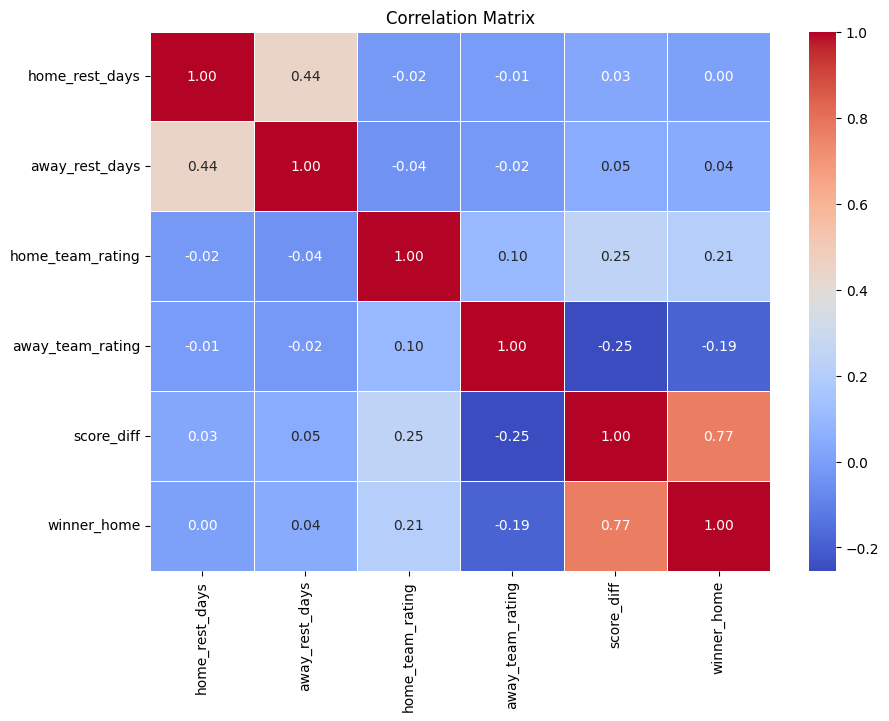

In [229]:
# Select a subset of columns for the correlation matrix
subset_cols = ['home_rest_days', 'away_rest_days', 'home_team_rating', 'away_team_rating', 'score_diff', 'winner_home']
corr_matrix = df[subset_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



The code analyzes the relationship between home team win percentage and the number of rest days by grouping the data by `home_rest_days`, calculating the average win percentage for each group, and then plotting the results as a bar chart. This helps visualize how rest days might influence a team's performance.

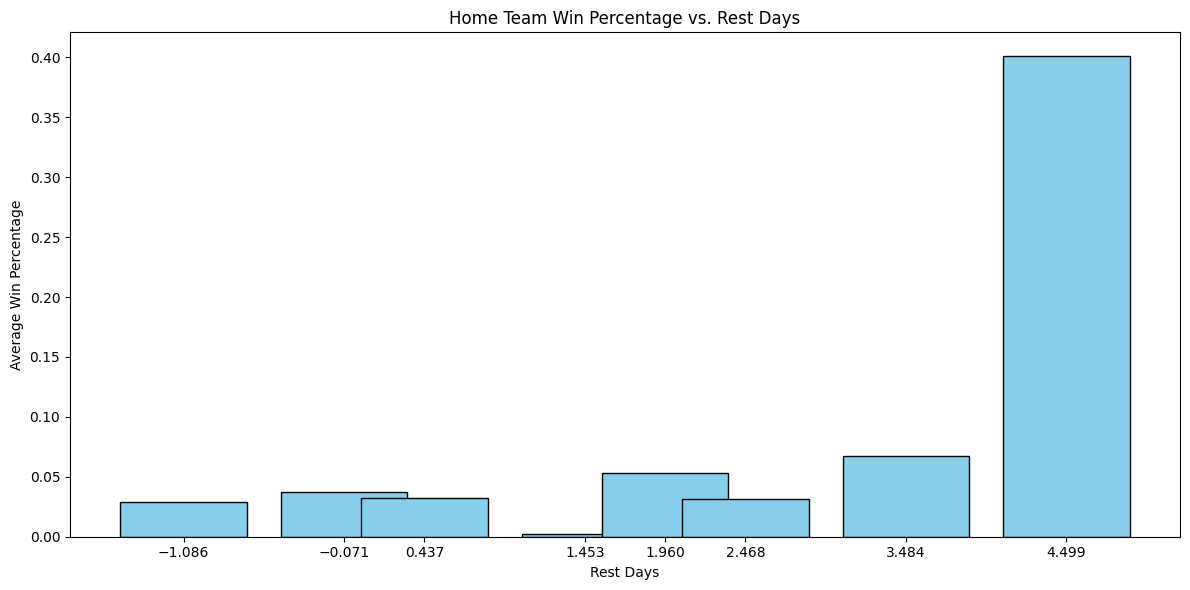

In [230]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by rest days and calculate the average win percentage
rest_days_analysis = df.groupby('home_rest_days')['home_team_win_percentage'].mean().reset_index()

# Ensure valid win percentage values (between 0 and 1)
rest_days_analysis = rest_days_analysis[(rest_days_analysis['home_team_win_percentage'] >= 0) & 
                                        (rest_days_analysis['home_team_win_percentage'] <= 1)]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(rest_days_analysis['home_rest_days'], rest_days_analysis['home_team_win_percentage'], color='skyblue', edgecolor='black')
plt.title('Home Team Win Percentage vs. Rest Days')
plt.xlabel('Rest Days')

plt.ylabel('Average Win Percentage')
plt.xticks(rest_days_analysis['home_rest_days'])
plt.tight_layout()
plt.show()

This code trains a Random Forest classifier to predict the `winner_home` outcome and evaluates its performance using accuracy, classification report, and confusion matrix. It also outputs the feature importances to identify which variables were most influential in the model's predictions. It gave 72% of accuracy

In [231]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(['winner_home', 'action_team', 'score_diff'], axis=1)
y = df['winner_home']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs = 100, n_estimators=100)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
print('Feature Importances:')
for i, feature in enumerate(X.columns):
    print(f'{feature}: {feature_importances[i]}')

Accuracy: 0.7221135029354208
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.51      0.57       372
         1.0       0.75      0.84      0.79       650

    accuracy                           0.72      1022
   macro avg       0.70      0.68      0.68      1022
weighted avg       0.71      0.72      0.71      1022

Confusion Matrix:
[[191 181]
 [103 547]]
Feature Importances:
home_rest_days: 0.01138536306005828
away_rest_days: 0.011729469741414119
home_team_home_rating: 0.021105690865051284
away_team_away_rating: 0.021646084978422863
home_team_rating: 0.02314200061646651
away_team_rating: 0.021016900082882838
home_team_home_win_percentage: 0.09181211608184298
away_team_away_win_percentage: 0.07132216387425577
home_team_win_percentage: 0.024681093549861838
away_team_win_percentage: 0.021661873184802928
home_team_home_score_mean: 0.01706216452139019
home_team_home_score_median: 0.0017486101781539426
away_team_away_score_mean: 

It creates a sorted list of tuples, where each tuple contains a feature name and its corresponding importance, sorted in descending order of importance.

In [232]:
feat_importances_dict = dict(zip(X.columns, feature_importances))
feat_importances_dict = sorted(feat_importances_dict.items(), key=lambda x: x[1], reverse=True)

feat_importances_dict

[('home_team_home_win_percentage', 0.09181211608184298),
 ('away_team_away_win_percentage', 0.07132216387425577),
 ('FG_pct_mean_away', 0.035992101895138226),
 ('PER_mean_away', 0.028091569001517182),
 ('PER_mean_home', 0.024908525014821152),
 ('home_team_win_percentage', 0.024681093549861838),
 ('PER_median_home', 0.024497213110365023),
 ('FG_pct_mean_home', 0.023859283858799096),
 ('PER_max_home', 0.023719090637981454),
 ('FG_pct_max_home', 0.023514006233627552),
 ('home_team_rating', 0.02314200061646651),
 ('PER_median_away', 0.022857333234866453),
 ('FG_pct_median_home', 0.022841161286790528),
 ('clutch_pct_mean_away', 0.022737590030526524),
 ('clutch_pct_mean_home', 0.02239751244330947),
 ('away_team_win_percentage', 0.021661873184802928),
 ('away_team_away_rating', 0.021646084978422863),
 ('FG_pct_median_away', 0.021353040352755155),
 ('home_team_home_rating', 0.021105690865051284),
 ('away_team_rating', 0.021016900082882838),
 ('FT_pct_mean_home', 0.020685252130289076),
 ('3P_pc

This converts the data types of the `X_train` and `X_test` datasets to `float64` for consistency in model training and prediction.

In [233]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

Initialize and train an XGBoost model, then predict and evaluate accuracy, classification report, and confusion matrix for the test data. It gives 72% of accuracy 

In [234]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7191780821917808
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59       372
         1.0       0.76      0.81      0.79       650

    accuracy                           0.72      1022
   macro avg       0.70      0.69      0.69      1022
weighted avg       0.71      0.72      0.72      1022

Confusion Matrix:
[[210 162]
 [125 525]]


In [235]:
# from sklearn.svm import SVC

# # Initialize the SVM classifier
# svm_classifier = SVC(random_state=42)

# # Fit the model on the training data
# svm_classifier.fit(X_train, y_train)

# # Predict on the testing data
# y_pred = svm_classifier.predict(X_test)

# # Evaluate the model
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# print('Classification Report:')
# print(classification_report(y_test, y_pred))

# print('Confusion Matrix:')
# print(confusion_matrix(y_test, y_pred))

In [236]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


The neural network model is trained using early stopping and learning rate reduction callbacks, and evaluated on accuracy, precision, recall, and AUC metrics. The confusion matrix indicates 209 true negatives, 163 false positives, 94 false negatives, and 556 true positives, with accuyracy as 74%

Epoch 1/500


/Users/ishaagrawal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5441 - auc_2: 0.5377 - loss: 1.6662 - precision_2: 0.6616 - recall_2: 0.6014 - val_accuracy: 0.6328 - val_auc_2: 0.6465 - val_loss: 1.5650 - val_precision_2: 0.6430 - val_recall_2: 0.8913 - learning_rate: 1.0000e-04
Epoch 2/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.6265 - auc_2: 0.6099 - loss: 1.5644 - precision_2: 0.6700 - recall_2: 0.8085 - val_accuracy: 0.6463 - val_auc_2: 0.6973 - val_loss: 1.4980 - val_precision_2: 0.6440 - val_recall_2: 0.9356 - learning_rate: 1.0000e-04
Epoch 3/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.6541 - auc_2: 0.6420 - loss: 1.4965 - precision_2: 0.6852 - recall_2: 0.8539 - val_accuracy: 0.6561 - val_auc_2: 0.7270 - val_loss: 1.4373 - val_precision_2: 0.6521 - val_recall_2: 0.9316 - learning_rate: 1.0000e-04
Epoch 4/500
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6752 - auc_2: 0.6935 - loss: 1.4234 - precision_2: 0.6932 - recall_2: 0.8782 - val_accurac

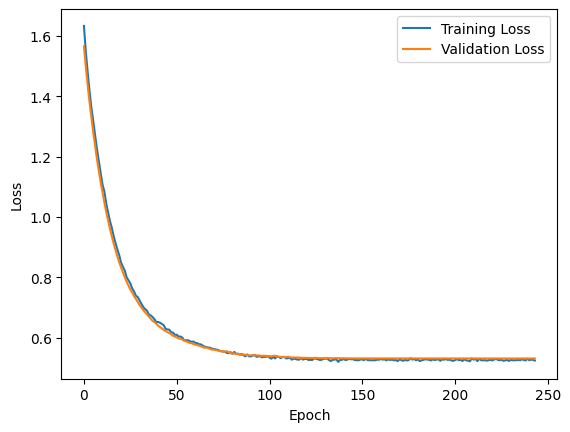

In [237]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer='l2', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with additional metrics
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define Reduce Learning Rate on Plateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Fit the model with callbacks and validation data
history = model.fit(X_train, y_train,
                    epochs=500,  # Set a larger number of epochs
                    batch_size=32,
                    validation_split=0.2,  # Use a validation split for monitoring
                    callbacks=[early_stopping, reduce_lr])

# Predict on the testing data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Decision Tree classifier


In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6565557729941291
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53       372
         1.0       0.73      0.73      0.73       650

    accuracy                           0.66      1022
   macro avg       0.63      0.63      0.63      1022
weighted avg       0.66      0.66      0.66      1022

Confusion Matrix:
[[199 173]
 [178 472]]


Lightgbm Classifier

In [239]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [240]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42, n_jobs=-1, max_depth=10, n_estimators=300, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, num_leaves=31)

# Fit the model on the training data
lgb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 2597, number of negative: 1487
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9757
[LightGBM] [Info] Number of data points in the train set: 4084, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635896 -> initscore=0.557596
[LightGBM] [Info] Start training from score 0.557596
Accuracy: 0.7211350293542075
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       372
         1.0       0.76      0.82      0.79       650

    accuracy                           0.72      1022
   macro avg       0.70      0.68      0.69      1022
weighted avg       0.71      0.72      0.72      1022

Confusion Matrix:
[[204 168]
 [117 533]]


The CatBoost model is trained and evaluated on the test data, then the accuracy, classification report, and confusion matrix are printed to assess its performance. The accuracy is computed using `accuracy_score`, and the classification metrics and confusion matrix provide detailed insights into the model's predictions 

In [241]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [242]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [243]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training output

# Fit the model on the training data
catboost_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7289628180039139
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.55      0.60       372
         1.0       0.76      0.83      0.80       650

    accuracy                           0.73      1022
   macro avg       0.71      0.69      0.70      1022
weighted avg       0.72      0.73      0.72      1022

Confusion Matrix:
[[204 168]
 [109 541]]


In [244]:
home_team = "AR-Pine Bluff"
away_team = "Abilene Chrstn"

# Define random players in each team
home_players = []
away_players = []

for i in range(5):
    home_players.append(np.random.choice(player_stats.index.unique()))
    away_players.append(np.random.choice(player_stats.index.unique()))

home_players, away_players

(['Evan Palmquist',
  'Matt Bengel',
  'Trey Campbell',
  'Jahmal Keyes',
  "Ze'Rik Onyema"],
 ['Marven Louissaint',
  'Micah Spatt',
  'Joshua Ryan',
  'Jesus Abel Jimenez',
  'Silas Wertz'])

The function predicts the winning team based on the model's output and selects the player with the highest weighted score for the winning team. It returns a tuple containing the predicted team, its probability, and the player who takes the winning shot.

In [245]:
def predict_winning_team_and_player(model, data, home_team, away_team, home_players, away_players):
    """
    Predicts the winning team and the player who takes the winning shot.

    Args:
      model: The trained machine learning model.
      data: The data to predict on.

    Returns:
      A tuple containing the predicted winning team and the player who takes the winning shot.
    """

    # Predict the winning team
    winning_team_pred = model.predict(data)
    winning_team_pred_value = winning_team_pred[0][0]

    # Get the index of the winning team
    winning_team_index = 1 if winning_team_pred_value >= 0.5 else 0

    # Get the probability of the winning team
    winning_team_prob = winning_team_pred_value if winning_team_index == 1 else 1 - winning_team_pred_value

    # Create a list to store the results
    results = []

    # Get the predicted winning team
    winning_team = home_team if winning_team_pred == 1 else away_team

    # Get the probability of the winning team
    prob = winning_team_prob

    # Get the players from the winning team
    # TODO: Get player name
    feature_weights = {'clutch_pct': 0.4, 'PER': 0.6}
    players = home_players if winning_team == home_team else away_players

    # Get the player with the highest feature value
    win_player_stats = player_stats.loc[players]
    win_player_stats['score'] = win_player_stats['clutch_pct'] * feature_weights['clutch_pct'] + win_player_stats['PER'] * feature_weights['PER']
    player = win_player_stats['score'].idxmax()

    player_name = player

    # Add the results to the list
    results.append((winning_team, prob, player_name))

    return results

In [246]:
def predict_winning_team_and_player_sklearn(model, data, home_team, away_team, home_players, away_players):
    """
    Predicts the winning team and the player who takes the winning shot.

    Args:
      model: The trained machine learning model.
      data: The data to predict on.

    Returns:
      A tuple containing the predicted winning team and the player who takes the winning shot.
    """

    # Predict the winning team
    winning_team_pred = model.predict(data)

    # Get the predicted probabilities for each class
    winning_team_probs = model.predict_proba(data)

    # Get the index of the winning team
    winning_team_index = np.argmax(winning_team_probs, axis=1)

    # Get the probability of the winning team
    winning_team_prob = winning_team_probs[np.arange(len(winning_team_probs)), winning_team_index]

    # Create a list to store the results
    results = []

    # Iterate over the predictions
    for i in range(len(winning_team_pred)):

      # Get the predicted winning team
      winning_team = home_team if winning_team_pred == 1 else away_team

      # Get the probability of the winning team
      prob = winning_team_prob[i]

      # Get the players from the winning team
      # TODO: Get player name
      feature_weights = {'clutch_pct': 0.4, 'PER': 0.6}
      players = home_players if winning_team == home_team else away_players

      # Get the player with the highest feature value
      win_player_stats = player_stats.loc[players]
      win_player_stats['score'] = win_player_stats['clutch_pct'] * feature_weights['clutch_pct'] + win_player_stats['PER'] * feature_weights['PER']
      player = win_player_stats['score'].idxmax()

      player_name = player

      # Add the results to the list
      results.append((winning_team, prob, player_name))

    return results

The code extracts unique values from the `player_stats` index, `games_and_dates` index, and from the `home_games` and `away_games` DataFrames, storing them in lists for further processing. Specifically, it generates lists of unique players, teams, home teams, and away teams.

In [247]:
unique_players = player_stats.index.unique().to_list()
unique_teams = games_and_dates.index.get_level_values('team').unique().to_list()
unique_home_teams = list(home_games['home'].unique())
unique_away_teams = list(away_games['away'].unique())

In [248]:
X.columns

Index(['home_rest_days', 'away_rest_days', 'home_team_home_rating',
       'away_team_away_rating', 'home_team_rating', 'away_team_rating',
       'home_team_home_win_percentage', 'away_team_away_win_percentage',
       'home_team_win_percentage', 'away_team_win_percentage',
       'home_team_home_score_mean', 'home_team_home_score_median',
       'away_team_away_score_mean', 'away_team_away_score_median',
       'home_team_score_mean', 'home_team_score_median',
       'away_team_score_mean', 'away_team_score_median', 'PER_mean_away',
       'PER_mean_home', 'PER_max_away', 'PER_max_home', 'PER_median_away',
       'PER_median_home', 'FG_pct_mean_away', 'FG_pct_mean_home',
       'FG_pct_max_away', 'FG_pct_max_home', 'FG_pct_median_away',
       'FG_pct_median_home', '3P_pct_mean_away', '3P_pct_mean_home',
       '3P_pct_max_away', '3P_pct_max_home', '3P_pct_median_away',
       '3P_pct_median_home', 'FT_pct_mean_away', 'FT_pct_mean_home',
       'FT_pct_max_away', 'FT_pct_max_home', '

In [249]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


This code sets up a Gradio interface for predicting the outcome of a game, including the winning team and MVP player, based on a set of input features like team performance, player statistics, and rest days. The input is processed into a dictionary, which is converted into a DataFrame. The model (in this case, a CatBoost classifier) is then used to predict the result, and the outcome is displayed as a string, detailing the winner, their probability, and the MVP.

In [250]:
import gradio as gr

home_team = gr.Dropdown(list(unique_home_teams), label="Home Team")
away_team = gr.Dropdown(list(unique_away_teams), label="Away Team")
home_players = gr.Dropdown(list(unique_players), label="Home Players", multiselect=True, max_choices=7)
away_players = gr.Dropdown(list(unique_players), label="Away Players", multiselect=True, max_choices=7)
home_rest_days = gr.Number(label="Home Team Rest Days")
away_rest_days = gr.Number(label="Away Team Rest Days")

output_text = gr.Textbox(label="Prediction")

def predict_winner_and_mvp(home_team, away_team, home_players, away_players, home_rest_days, away_rest_days):
    # create a dict with the features
    data_dict = dict()
    data_dict["home_rest_days"] = home_rest_days
    data_dict["away_rest_days"] = away_rest_days
    data_dict["home_team_home_rating"] = home_team_performance[home_team]
    data_dict["away_team_away_rating"] = away_team_performance[away_team]
    data_dict["home_team_rating"] = team_performance[home_team]
    data_dict["away_team_rating"] = team_performance[away_team]
    data_dict["home_team_home_win_percentage"] = home_win_percentage[home_team]
    data_dict["away_team_away_win_percentage"] = away_win_percentage[away_team]
    data_dict["home_team_win_percentage"] = team_win_percentage[home_team]
    data_dict["away_team_win_percentage"] = team_win_percentage[away_team]
    data_dict["home_team_home_score_mean"] = home_team_scores.loc[home_team, 'home_team_home_score_mean']
    data_dict["home_team_home_score_median"] = home_team_scores.loc[home_team, 'home_team_home_score_median']
    data_dict["away_team_away_score_mean"] = away_team_scores.loc[away_team, 'away_team_away_score_mean']
    data_dict["away_team_away_score_median"] = away_team_scores.loc[away_team, 'away_team_away_score_median']
    data_dict["home_team_score_mean"] = team_scores.loc[home_team, 'mean_points']
    data_dict["home_team_score_median"] = team_scores.loc[home_team, 'median_points']
    data_dict["away_team_score_mean"] = team_scores.loc[away_team, 'mean_points']
    data_dict["away_team_score_median"] = team_scores.loc[away_team, 'median_points']
    data_dict["PER_mean_away"] = player_stats.loc[away_players, 'PER'].mean()
    data_dict["PER_mean_home"] = player_stats.loc[home_players, 'PER'].mean()
    data_dict["PER_max_away"] = player_stats.loc[away_players, 'PER'].max()
    data_dict["PER_max_home"] = player_stats.loc[home_players, 'PER'].max()
    data_dict["PER_median_away"] = player_stats.loc[away_players, 'PER'].median()
    data_dict["PER_median_home"] = player_stats.loc[home_players, 'PER'].median()
    data_dict["FG_pct_mean_away"] = player_stats.loc[away_players, 'FG_pct'].mean()
    data_dict["FG_pct_mean_home"] = player_stats.loc[home_players, 'FG_pct'].mean()
    data_dict["FG_pct_max_away"] = player_stats.loc[away_players, 'FG_pct'].max()
    data_dict["FG_pct_max_home"] = player_stats.loc[home_players, 'FG_pct'].max()
    data_dict["FG_pct_median_away"] = player_stats.loc[away_players, 'FG_pct'].median()
    data_dict["FG_pct_median_home"] = player_stats.loc[home_players, 'FG_pct'].median()
    data_dict["3P_pct_mean_away"] = player_stats.loc[away_players, '3P_pct'].mean()
    data_dict["3P_pct_mean_home"] = player_stats.loc[home_players, '3P_pct'].mean()
    data_dict["3P_pct_max_away"] = player_stats.loc[away_players, '3P_pct'].max()
    data_dict["3P_pct_max_home"] = player_stats.loc[home_players, '3P_pct'].max()
    data_dict["3P_pct_median_away"] = player_stats.loc[away_players, '3P_pct'].median()
    data_dict["3P_pct_median_home"] = player_stats.loc[home_players, '3P_pct'].median()
    data_dict["FT_pct_mean_away"] = player_stats.loc[away_players, 'FT_pct'].mean()
    data_dict["FT_pct_mean_home"] = player_stats.loc[home_players, 'FT_pct'].mean()
    data_dict["FT_pct_max_away"] = player_stats.loc[away_players, 'FT_pct'].max()
    data_dict["FT_pct_max_home"] = player_stats.loc[home_players, 'FT_pct'].max()
    data_dict["FT_pct_median_away"] = player_stats.loc[away_players, 'FT_pct'].median()
    data_dict["FT_pct_median_home"] = player_stats.loc[home_players, 'FT_pct'].median()
    data_dict["clutch_pct_mean_away"] = player_stats.loc[away_players, 'clutch_pct'].mean()
    data_dict["clutch_pct_mean_home"] = player_stats.loc[home_players, 'clutch_pct'].mean()
    data_dict["clutch_pct_max_away"] = player_stats.loc[away_players, 'clutch_pct'].max()
    data_dict["clutch_pct_max_home"] = player_stats.loc[home_players, 'clutch_pct'].max()
    data_dict["clutch_pct_median_away"] = player_stats.loc[away_players, 'clutch_pct'].median()
    data_dict["clutch_pct_median_home"] = player_stats.loc[home_players, 'clutch_pct'].median()

    # Create a DataFrame from the data
    data_df = pd.DataFrame(data_dict, index=[0])

    # Rearrange the columns to match the model's input order
    data_df = data_df[X.columns]

    # Predict the winning team and MVP
    results = predict_winning_team_and_player_sklearn(catboost_classifier, data_df, home_team, away_team, home_players, away_players)

    # Convert the results to a string
    output = ['\n'.join([f'{result[0]} wins with a probability of {result[1]:.2f} and the MVP is {result[2]}' for result in results])]

    return output[0]


The function `predict_winner_and_mvp` predicts the winner and MVP of a basketball game based on selected teams and players, using their performance statistics and rest days. It takes specific teams and players from the provided lists and computes the prediction accordingly.

In [251]:
predict_winner_and_mvp(unique_home_teams[100], unique_away_teams[35], 
                       unique_players[1000:1006], 
                       unique_players[70:79], 0, 0)

'Maine wins with a probability of 0.99 and the MVP is Brandon Rush'

In [252]:
unique_home_teams[100], unique_away_teams[35]

('Maine', 'N Colorado')

This code sets the environment variable for Node.js and then launches a Gradio web app with the `predict_winner_and_mvp` function. It takes user inputs for teams, players, and rest days, and displays the prediction output in a text box.

In [253]:
# Launch the web app
import os
os.environ['GRADIO_NODE_PATH'] = '/usr/local/bin/node'
iface = gr.Interface(
            predict_winner_and_mvp, 
            [home_team, away_team, home_players, away_players, home_rest_days, away_rest_days],
            outputs=output_text)
iface.launch(debug=True, inline=True, height=1000)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
